In [2]:
#***************************
# Author: Jonah Zembower
# Date: 12/20/2024
# Project: Harvard Research Study on Postural Stability During Heart Catheterization Surgeries
#***************************

In [3]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read in the necessary data from specific sheets
case_1_pd_density = pd.read_excel('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Harvard Data\\Leigh\\Leigh_case1.xlsx', sheet_name='Case 1')
case_2_pd_density = pd.read_excel('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Harvard Data\\Leigh\\Leigh_case2_leadexcel.xlsx', sheet_name='Case 2')
case_3_pd_density = pd.read_excel('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Harvard Data\\Leigh\\Leigh_case3.xlsx', sheet_name='Case 3')
case_4_pd_density = pd.read_excel('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Harvard Data\\Leigh\\Leigh_case4.xlsx', sheet_name='Case 4')
ROM_Baseline_pd_density = pd.read_excel('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Harvard Data\\Leigh\\Leigh_ROMbaseline.xlsx', sheet_name='ROM_Baseline')

Case 1 and 4 were rampart data for Leigh. While, Case 2 and 3 was the lead data.

In a heart catheterization procedure, "lead" refers to the traditional lead aprons and shields worn by medical staff to protect them from radiation exposure during the procedure, while "Rampart" is a specific, newer technology that acts as a mobile radiation shielding system, designed to significantly reduce radiation exposure compared to standard lead aprons, often allowing for "lead-free" operation in the cath lab; essentially. Rampart is a more advanced alternative. But, we want to assess the effects on the surgeons.

# EDA

In [5]:
# View case 1
case_1_pd_density.head()

,Subject,Sex,Date Measured,Time[Ch. units],CERVICAL PS LT [%],CERVICAL PS RT [%],UPPER TRAP. LT [%],UPPER TRAP. RT [%],LUMBAR ES LT [%],LUMBAR ES RT [%],MIDDLE TRAP. LT [%],MIDDLE TRAP. RT [%]
0,Leigh,Female,10/4/2024 07:49,0,7.91518,4.89732,63.5268,64.9018,15.2366,7.79464,76.8795,81.8884
1,NaN,NaN,NaN,10,33.29460,34.76790,92.8304,92.3125,44.0313,25.61610,96.0938,96.3348
2,NaN,NaN,NaN,20,63.45090,64.85710,98.7545,97.2500,54.4598,34.13390,98.8259,98.7902
3,NaN,NaN,NaN,30,85.53130,84.33480,99.6250,99.0402,65.9464,49.34820,99.6473,99.3705
4,NaN,NaN,NaN,40,93.32590,92.04020,99.8839,99.6518,76.2143,68.93300,99.7991,99.7188


In [6]:
# View case 2
case_2_pd_density.head()

,Time[Ch. units],CERVICAL PS LT [%],CERVICAL PS RT [%],UPPER TRAP. LT [%],UPPER TRAP. RT [%],LUMBAR ES LT [%],LUMBAR ES RT [%],MIDDLE TRAP. LT [%],MIDDLE TRAP. RT [%]
0,0,7.59517,7.67894,69.6007,81.1548,11.7775,5.56607,84.5925,87.4469
1,10,42.58940,34.17520,93.1681,96.4692,29.3041,12.76410,96.0659,97.6389
2,20,80.81660,64.71100,98.5076,98.8738,43.1758,24.70290,98.2812,99.2150
3,30,92.84850,84.04950,99.4695,99.4570,56.8025,41.50040,99.3081,99.5036
4,40,96.70810,92.22490,99.7735,99.6742,69.2439,60.35490,99.7177,99.7549


In [7]:
# View case 3
case_3_pd_density.head()

,Subject,Sex,Date Measured,Time[Ch. units],CERVICAL PS LT [%],CERVICAL PS RT [%],UPPER TRAP. LT [%],UPPER TRAP. RT [%],LUMBAR ES LT [%],LUMBAR ES RT [%],MIDDLE TRAP. LT [%],MIDDLE TRAP. RT [%]
0,Leigh,Female,10/4/2024 11:30,0,32.3420,14.4981,91.2102,89.6159,16.1586,1.40438,93.8703,91.8463
1,NaN,NaN,NaN,10,70.7641,58.1578,99.3143,98.0173,51.3424,4.75836,99.3391,99.0417
2,NaN,NaN,NaN,20,90.1363,85.4440,99.8678,99.6530,69.3350,10.05370,99.9009,99.8843
3,NaN,NaN,NaN,30,95.8777,94.5642,99.9504,99.9174,84.0727,35.05990,99.9670,99.9670
4,NaN,NaN,NaN,40,97.8852,97.4473,99.9752,99.9835,91.9620,63.30440,100.0000,99.9752


In [8]:
# View case 4
case_4_pd_density.head()

,Subject,Sex,Date Measured,Time[Ch. units],CERVICAL PS LT [%],CERVICAL PS RT [%],UPPER TRAP. LT [%],UPPER TRAP. RT [%],LUMBAR ES LT [%],LUMBAR ES RT [%],MIDDLE TRAP. LT [%],MIDDLE TRAP. RT [%]
0,Leigh,Female,10/4/2024 13:09,0,38.5055,26.0118,76.8791,84.2697,24.0510,6.23429,89.6179,91.0382
1,NaN,NaN,NaN,10,75.2514,61.7836,96.8577,97.6433,51.2381,16.37760,98.1272,98.5923
2,NaN,NaN,NaN,20,92.4899,86.1362,99.5538,99.2647,67.1506,35.21870,99.5161,99.5978
3,NaN,NaN,NaN,30,97.2976,94.2936,99.9120,99.6858,78.7582,57.95000,99.8177,99.8680
4,NaN,NaN,NaN,40,98.9002,97.2097,99.9811,99.8303,87.1481,77.57670,99.9372,99.9686


In [9]:
# View ROM Baseline
ROM_Baseline_pd_density.head()

,Subject,Sex,Date Measured,Time[Ch. units],CERVICAL PS LT [%],CERVICAL PS RT [%],UPPER TRAP. LT [%],UPPER TRAP. RT [%],LUMBAR ES LT [%],LUMBAR ES RT [%],MIDDLE TRAP. LT [%],MIDDLE TRAP. RT [%]
0,Leigh,Female,10/4/2024 07:49,0,8.15828,5.05344,64.3818,65.3169,14.8102,7.76212,77.0684,81.9514
1,NaN,NaN,NaN,10,33.93680,35.71030,93.0394,92.3024,43.6797,25.75090,96.2226,96.2456
2,NaN,NaN,NaN,20,63.73230,66.15530,98.7654,97.2130,54.0400,34.30070,98.8484,98.7562
3,NaN,NaN,NaN,30,85.83930,85.36020,99.6223,99.0188,65.7361,49.70520,99.6499,99.3551
4,NaN,NaN,NaN,40,93.44940,92.49120,99.8802,99.6407,76.2115,69.46750,99.7927,99.7098


These values are the EMG Amplitude Probability Density Function. Begin to visualize the data.

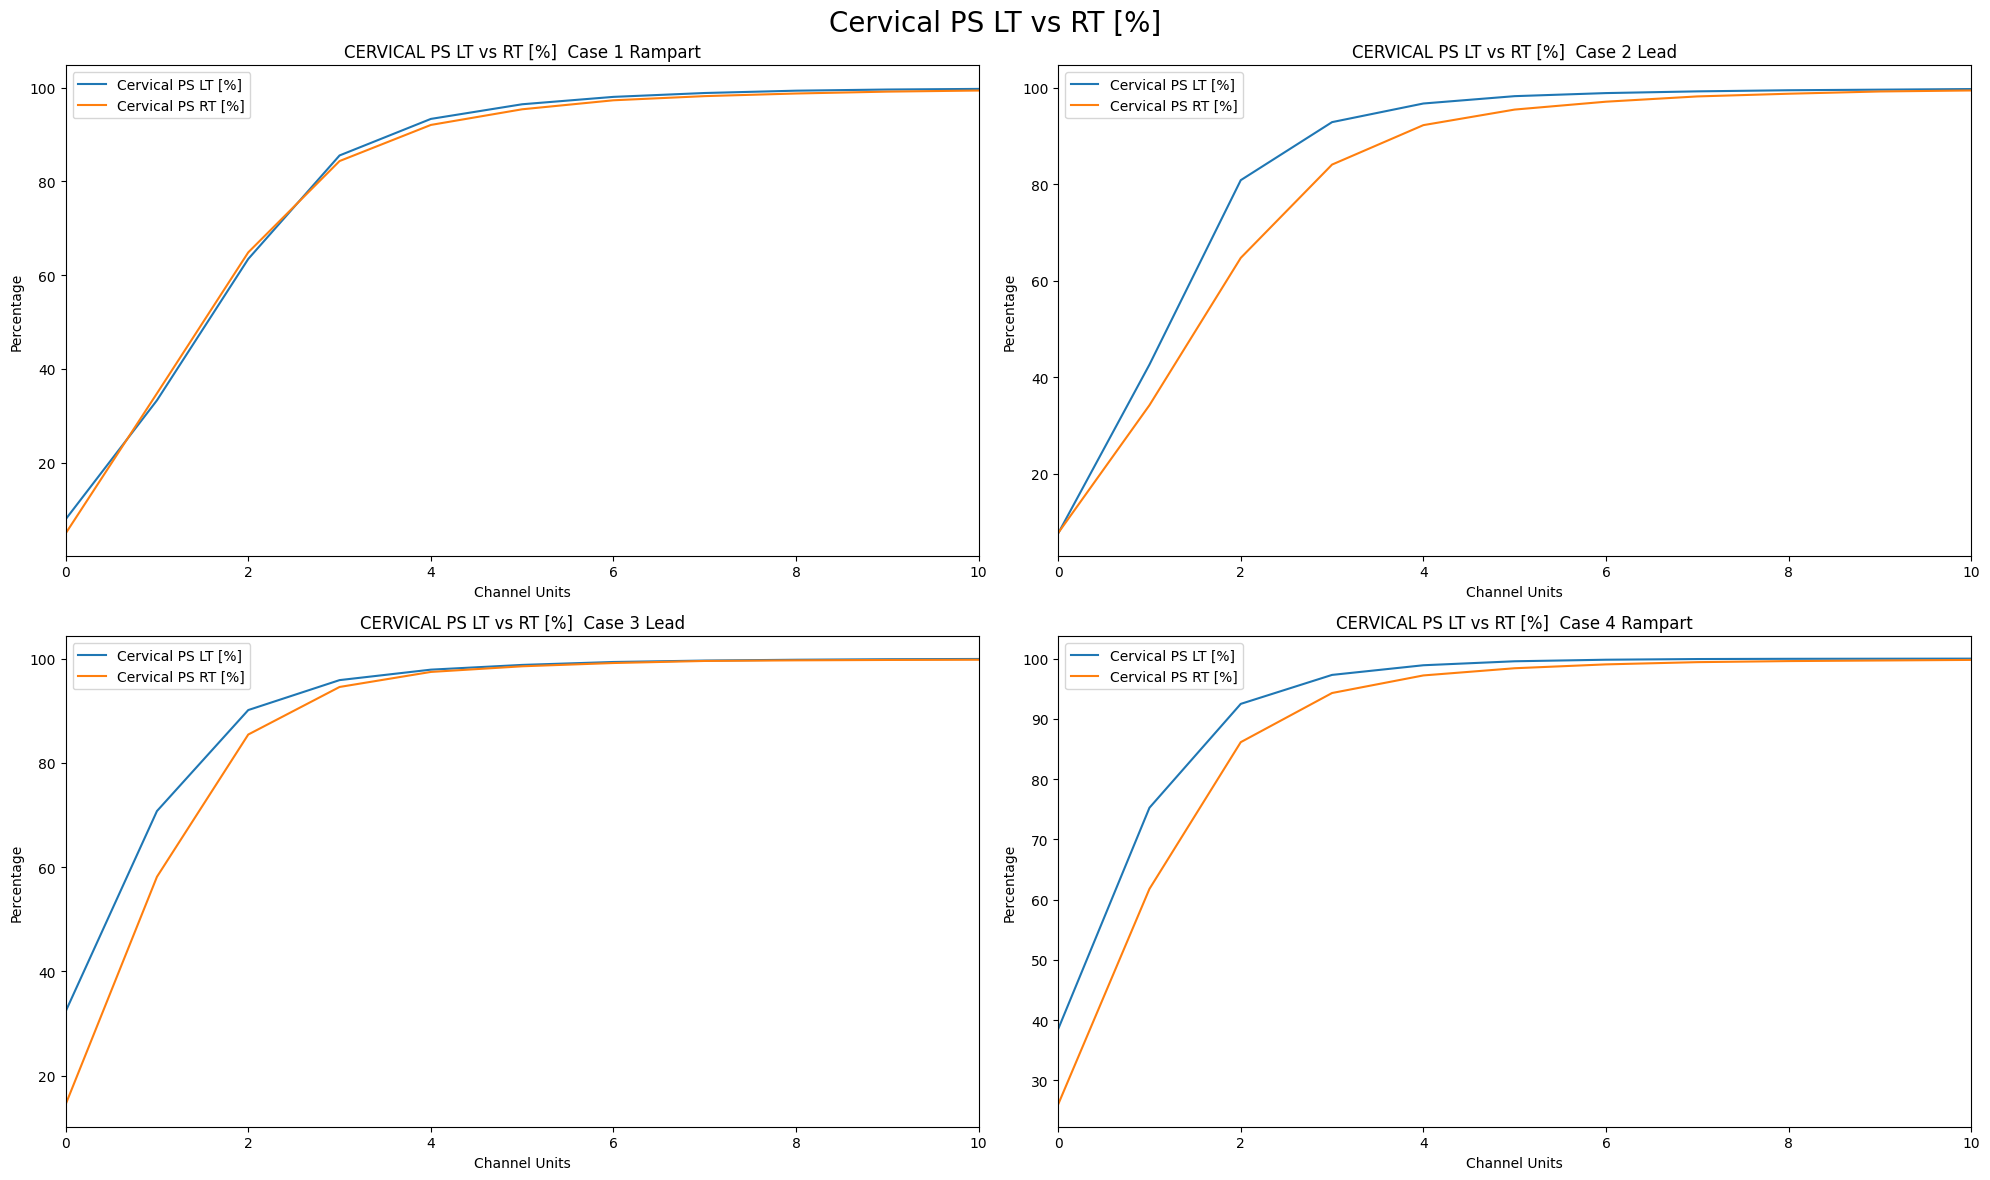

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
fig.suptitle('Cervical PS LT vs RT [%]', fontsize=20)

# Plot the data for case 1
axes[0, 0].plot(case_1_pd_density['CERVICAL PS LT [%]'], label='Cervical PS LT [%]')
axes[0, 0].plot(case_1_pd_density['CERVICAL PS RT [%]'], label='Cervical PS RT [%]')
axes[0, 0].set_title('CERVICAL PS LT vs RT [%]  Case 1 Rampart')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, 10)  # Adjust the x-axis limit
axes[0, 0].set_xlabel('Channel Units')
axes[0, 0].set_ylabel('Percentage')

# Plot the data for case 2
axes[0, 1].plot(case_2_pd_density['CERVICAL PS LT [%]'], label='Cervical PS LT [%]')
axes[0, 1].plot(case_2_pd_density['CERVICAL PS RT [%]'], label='Cervical PS RT [%]')
axes[0, 1].set_title('CERVICAL PS LT vs RT [%]  Case 2 Lead')
axes[0, 1].legend()
axes[0, 1].set_xlim(0, 10)  # Adjust the x-axis limit
axes[0, 1].set_xlabel('Channel Units')
axes[0, 1].set_ylabel('Percentage')

# Plot the data for case 3
axes[1, 0].plot(case_3_pd_density['CERVICAL PS LT [%]'], label='Cervical PS LT [%]')
axes[1, 0].plot(case_3_pd_density['CERVICAL PS RT [%]'], label='Cervical PS RT [%]')
axes[1, 0].set_title('CERVICAL PS LT vs RT [%]  Case 3 Lead')
axes[1, 0].legend()
axes[1, 0].set_xlim(0, 10)  # Adjust the x-axis limit
axes[1, 0].set_xlabel('Channel Units')
axes[1, 0].set_ylabel('Percentage')

# Plot the data for case 4
axes[1, 1].plot(case_4_pd_density['CERVICAL PS LT [%]'], label='Cervical PS LT [%]')
axes[1, 1].plot(case_4_pd_density['CERVICAL PS RT [%]'], label='Cervical PS RT [%]')
axes[1, 1].set_title('CERVICAL PS LT vs RT [%]  Case 4 Rampart')
axes[1, 1].legend()
axes[1, 1].set_xlim(0, 10)  # Adjust the x-axis limit
axes[1, 1].set_xlabel('Channel Units')
axes[1, 1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

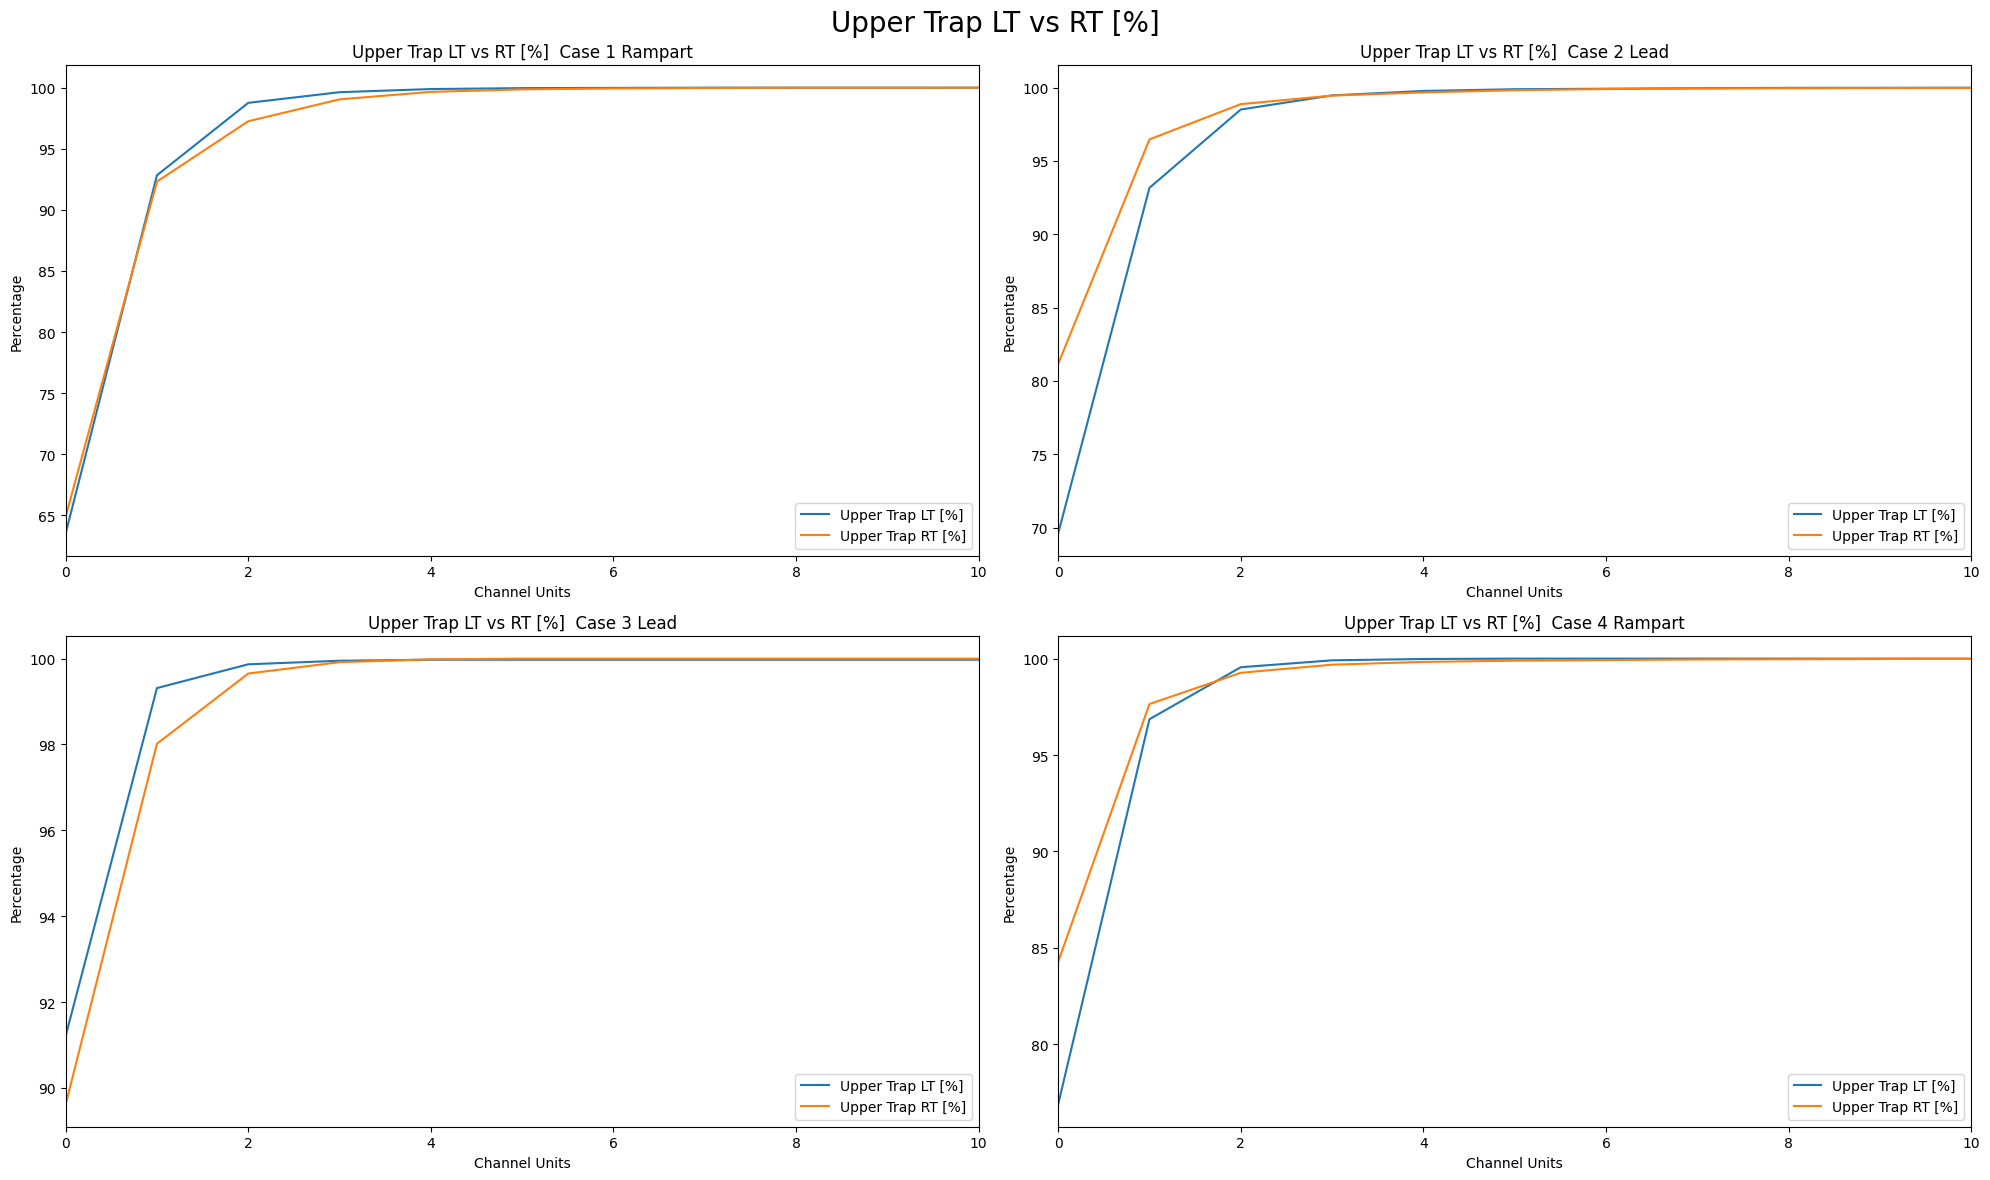

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
fig.suptitle('Upper Trap LT vs RT [%]', fontsize=20)

# Plot the data for case 1
axes[0, 0].plot(case_1_pd_density['UPPER TRAP. LT [%]'], label='Upper Trap LT [%]')
axes[0, 0].plot(case_1_pd_density['UPPER TRAP. RT [%]'], label='Upper Trap RT [%]')
axes[0, 0].set_title('Upper Trap LT vs RT [%]  Case 1 Rampart')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, 10)  # Adjust the x-axis limit
axes[0, 0].set_xlabel('Channel Units')
axes[0, 0].set_ylabel('Percentage')

# Plot the data for case 2
axes[0, 1].plot(case_2_pd_density['UPPER TRAP. LT [%]'], label='Upper Trap LT [%]')
axes[0, 1].plot(case_2_pd_density['UPPER TRAP. RT [%]'], label='Upper Trap RT [%]')
axes[0, 1].set_title('Upper Trap LT vs RT [%]  Case 2 Lead')
axes[0, 1].legend()
axes[0, 1].set_xlim(0, 10)  # Adjust the x-axis limit
axes[0, 1].set_xlabel('Channel Units')
axes[0, 1].set_ylabel('Percentage')

# Plot the data for case 3
axes[1, 0].plot(case_3_pd_density['UPPER TRAP. LT [%]'], label='Upper Trap LT [%]')
axes[1, 0].plot(case_3_pd_density['UPPER TRAP. RT [%]'], label='Upper Trap RT [%]')
axes[1, 0].set_title('Upper Trap LT vs RT [%]  Case 3 Lead')
axes[1, 0].legend()
axes[1, 0].set_xlim(0, 10)  # Adjust the x-axis limit
axes[1, 0].set_xlabel('Channel Units')
axes[1, 0].set_ylabel('Percentage')

# Plot the data for case 4
axes[1, 1].plot(case_4_pd_density['UPPER TRAP. LT [%]'], label='Upper Trap LT [%]')
axes[1, 1].plot(case_4_pd_density['UPPER TRAP. RT [%]'], label='Upper Trap RT [%]')
axes[1, 1].set_title('Upper Trap LT vs RT [%]  Case 4 Rampart')
axes[1, 1].legend()
axes[1, 1].set_xlim(0, 10)  # Adjust the x-axis limit
axes[1, 1].set_xlabel('Channel Units')
axes[1, 1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

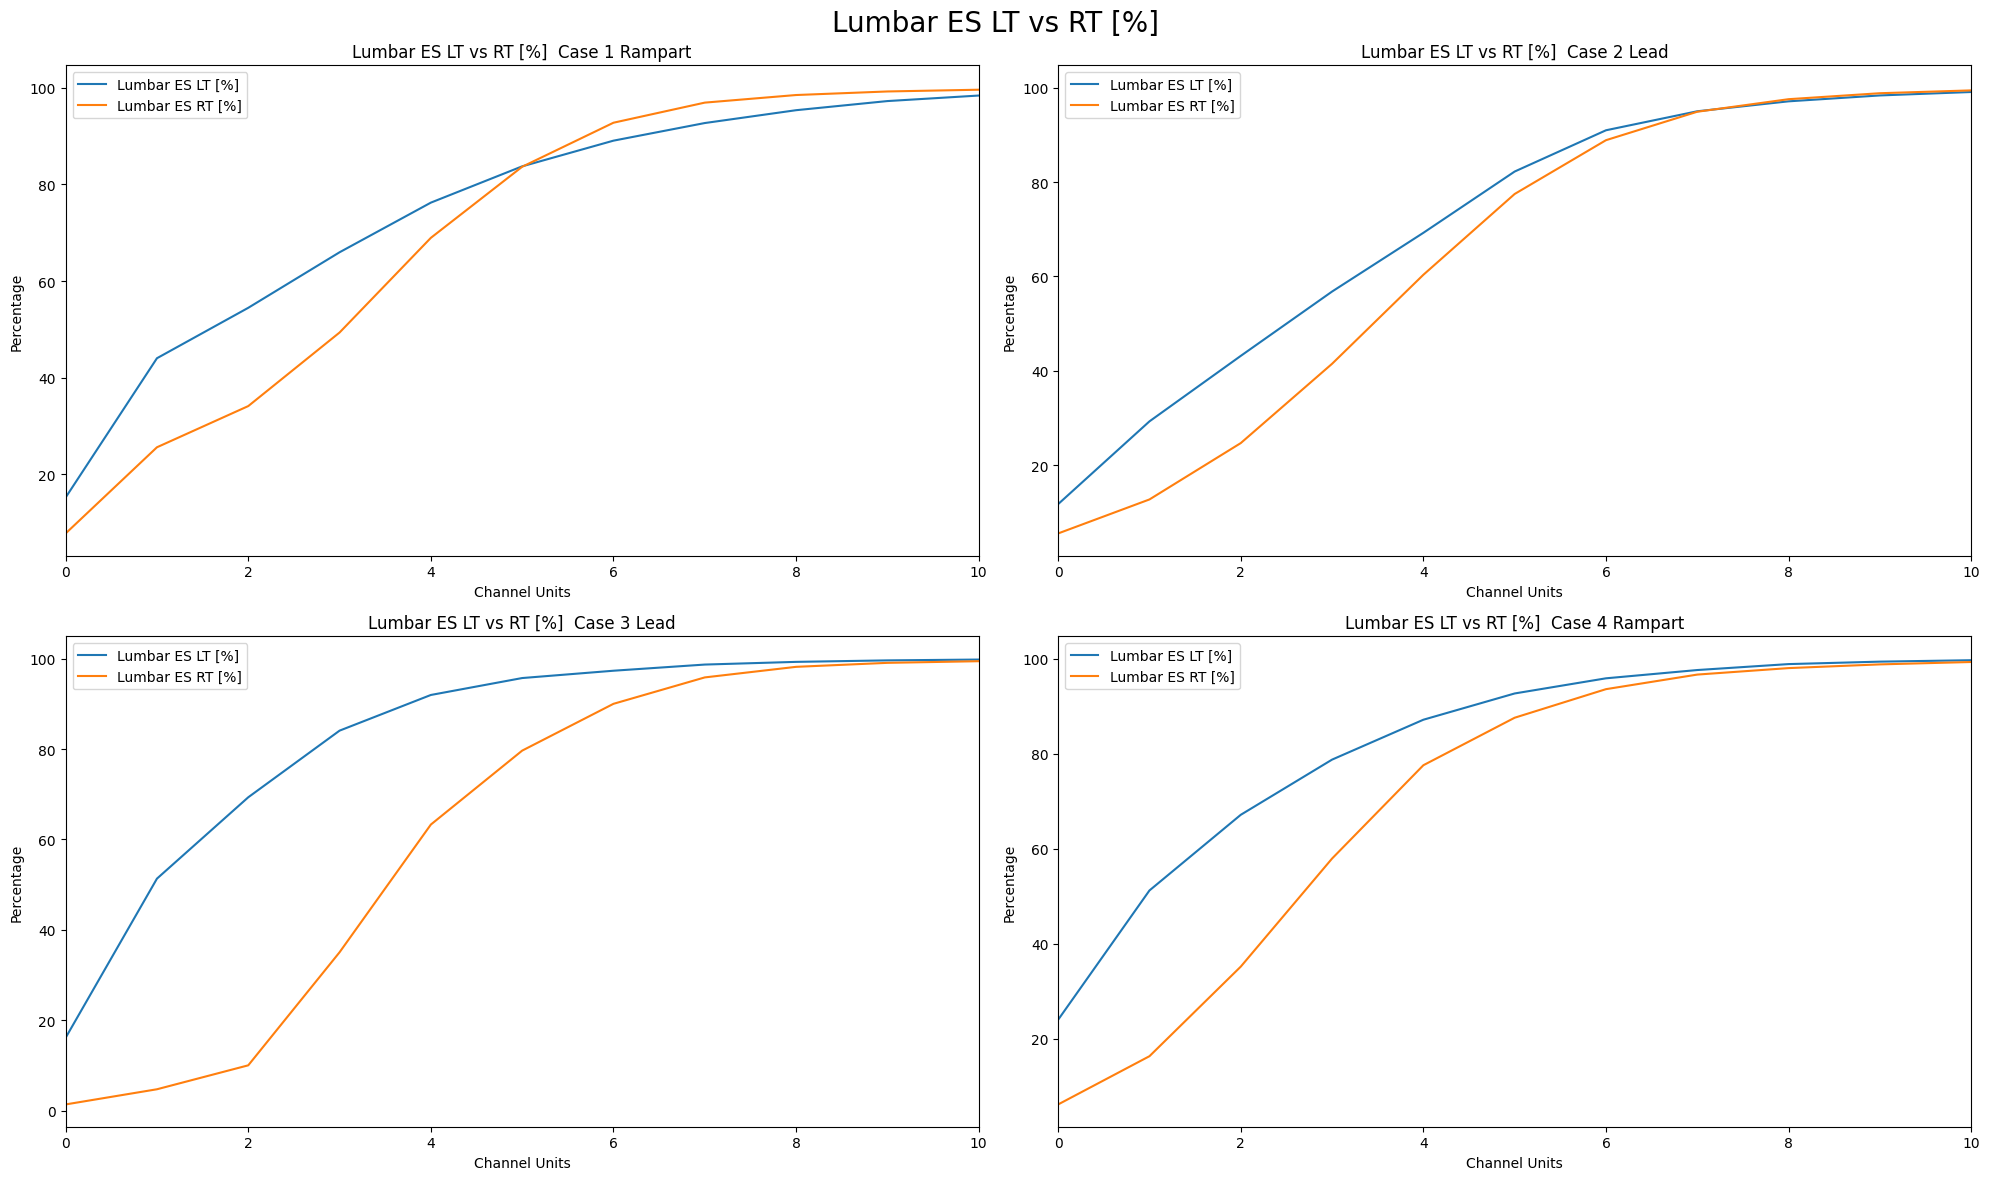

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
fig.suptitle('Lumbar ES LT vs RT [%]', fontsize=20)

# Plot the data for case 1
axes[0, 0].plot(case_1_pd_density['LUMBAR ES LT [%]'], label='Lumbar ES LT [%]')
axes[0, 0].plot(case_1_pd_density['LUMBAR ES RT [%]'], label='Lumbar ES RT [%]')
axes[0, 0].set_title('Lumbar ES LT vs RT [%]  Case 1 Rampart')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, 10)  # Adjust the x-axis limit as needed
axes[0, 0].set_xlabel('Channel Units')
axes[0, 0].set_ylabel('Percentage')

# Plot the data for case 2
axes[0, 1].plot(case_2_pd_density['LUMBAR ES LT [%]'], label='Lumbar ES LT [%]')
axes[0, 1].plot(case_2_pd_density['LUMBAR ES RT [%]'], label='Lumbar ES RT [%]')
axes[0, 1].set_title('Lumbar ES LT vs RT [%]  Case 2 Lead')
axes[0, 1].legend()
axes[0, 1].set_xlim(0, 10)  # Adjust the x-axis limit as needed
axes[0, 1].set_xlabel('Channel Units')
axes[0, 1].set_ylabel('Percentage')

# Plot the data for case 3
axes[1, 0].plot(case_3_pd_density['LUMBAR ES LT [%]'], label='Lumbar ES LT [%]')
axes[1, 0].plot(case_3_pd_density['LUMBAR ES RT [%]'], label='Lumbar ES RT [%]')
axes[1, 0].set_title('Lumbar ES LT vs RT [%]  Case 3 Lead')
axes[1, 0].legend()
axes[1, 0].set_xlim(0, 10)  # Adjust the x-axis limit as needed
axes[1, 0].set_xlabel('Channel Units')
axes[1, 0].set_ylabel('Percentage')

# Plot the data for case 4
axes[1, 1].plot(case_4_pd_density['LUMBAR ES LT [%]'], label='Lumbar ES LT [%]')
axes[1, 1].plot(case_4_pd_density['LUMBAR ES RT [%]'], label='Lumbar ES RT [%]')
axes[1, 1].set_title('Lumbar ES LT vs RT [%]  Case 4 Rampart')
axes[1, 1].legend()
axes[1, 1].set_xlim(0, 10)  # Adjust the x-axis limit as needed
axes[1, 1].set_xlabel('Channel Units')
axes[1, 1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

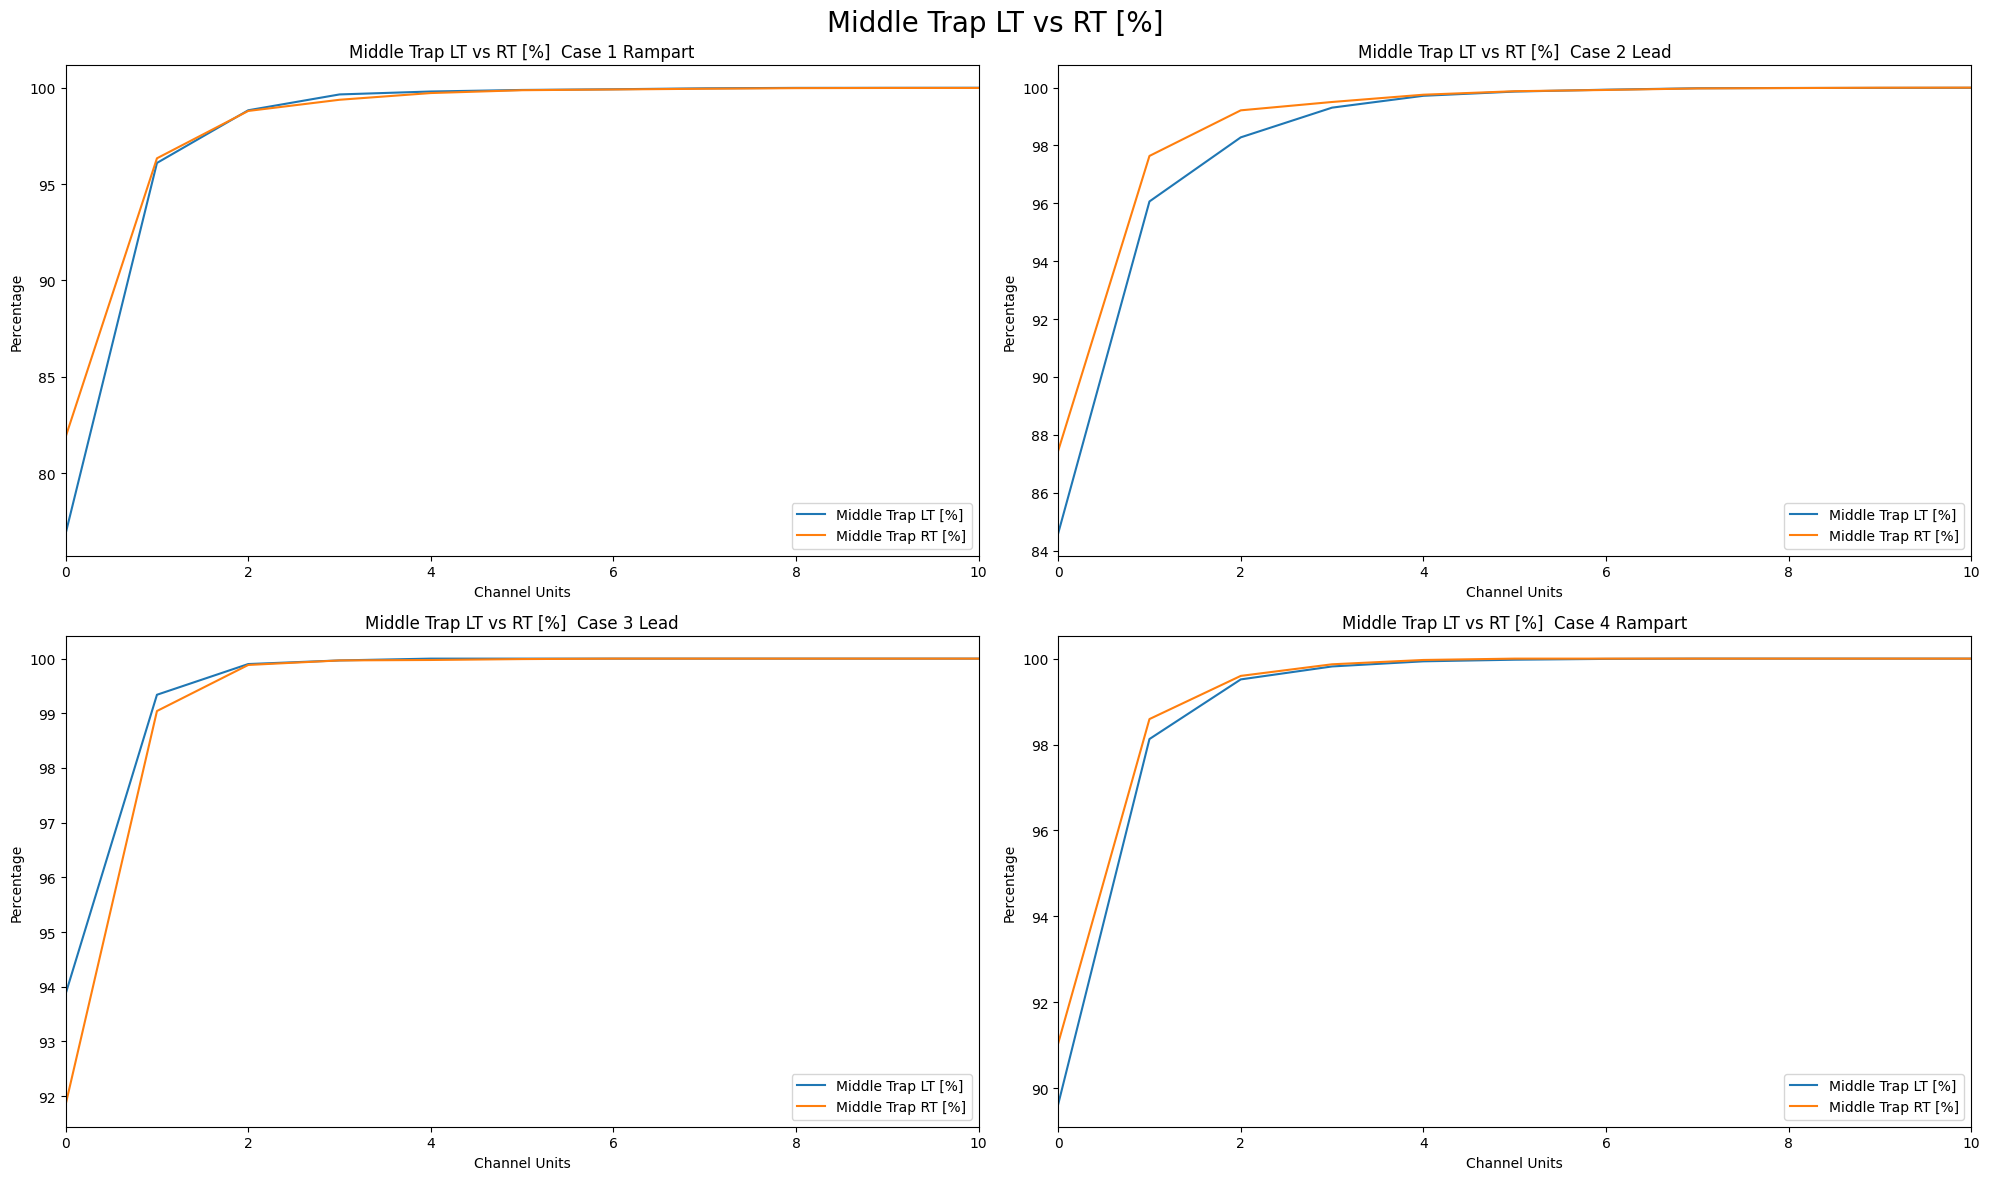

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
fig.suptitle('Middle Trap LT vs RT [%]', fontsize=20)

# Plot the data for case 1
axes[0, 0].plot(case_1_pd_density['MIDDLE TRAP. LT [%]'], label='Middle Trap LT [%]')
axes[0, 0].plot(case_1_pd_density['MIDDLE TRAP. RT [%]'], label='Middle Trap RT [%]')
axes[0, 0].set_title('Middle Trap LT vs RT [%]  Case 1 Rampart')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, 10)  # Adjust the x-axis limit as needed
axes[0, 0].set_xlabel('Channel Units')
axes[0, 0].set_ylabel('Percentage')

# Plot the data for case 2
axes[0, 1].plot(case_2_pd_density['MIDDLE TRAP. LT [%]'], label='Middle Trap LT [%]')
axes[0, 1].plot(case_2_pd_density['MIDDLE TRAP. RT [%]'], label='Middle Trap RT [%]')
axes[0, 1].set_title('Middle Trap LT vs RT [%]  Case 2 Lead')
axes[0, 1].legend()
axes[0, 1].set_xlim(0, 10)  # Adjust the x-axis limit as needed
axes[0, 1].set_xlabel('Channel Units')
axes[0, 1].set_ylabel('Percentage')

# Plot the data for case 3
axes[1, 0].plot(case_3_pd_density['MIDDLE TRAP. LT [%]'], label='Middle Trap LT [%]')
axes[1, 0].plot(case_3_pd_density['MIDDLE TRAP. RT [%]'], label='Middle Trap RT [%]')
axes[1, 0].set_title('Middle Trap LT vs RT [%]  Case 3 Lead')
axes[1, 0].legend()
axes[1, 0].set_xlim(0, 10)  # Adjust the x-axis limit as needed
axes[1, 0].set_xlabel('Channel Units')
axes[1, 0].set_ylabel('Percentage')

# Plot the data for case 4
axes[1, 1].plot(case_4_pd_density['MIDDLE TRAP. LT [%]'], label='Middle Trap LT [%]')
axes[1, 1].plot(case_4_pd_density['MIDDLE TRAP. RT [%]'], label='Middle Trap RT [%]')
axes[1, 1].set_title('Middle Trap LT vs RT [%]  Case 4 Rampart')
axes[1, 1].legend()
axes[1, 1].set_xlim(0, 10)  # Adjust the x-axis limit as needed
axes[1, 1].set_xlabel('Channel Units')
axes[1, 1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

In [15]:
variables_RT = ['CERVICAL PS RT [%]', 'UPPER TRAP. RT [%]', 'LUMBAR ES RT [%]', 'MIDDLE TRAP. RT [%]']
variables_LT = ['CERVICAL PS LT [%]', 'UPPER TRAP. LT [%]', 'LUMBAR ES LT [%]', 'MIDDLE TRAP. LT [%]']

# Subtract all variables from RT from their respective muscle in LT
differences = pd.DataFrame()
for var in variables_LT:
    differences[f'{var} - RT [%]'] = ROM_Baseline_pd_density[var] - ROM_Baseline_pd_density[var.replace('LT', 'RT')]

# Save the differences to a CSV file
differences.to_csv('Leigh_differences_ROM.csv', index=False)

In [16]:
# Subtract all variables from RT from their respective muscle in LT
differences = pd.DataFrame()
for var in variables_LT:
    differences[f'{var} - RT [%]'] = case_1_pd_density[var] - case_1_pd_density[var.replace('LT', 'RT')]

# Save the differences to a CSV file
differences.to_csv('Leigh_differences_Case1.csv', index=False)

In [17]:
# Subtract all variables from RT from their respective muscle in LT
differences = pd.DataFrame()
for var in variables_LT:
    differences[f'{var} - RT [%]'] = case_2_pd_density[var] - case_2_pd_density[var.replace('LT', 'RT')]

# Save the differences to a CSV file
differences.to_csv('Leigh_differences_Case2.csv', index=False)

In [18]:
# Subtract all variables from RT from their respective muscle in LT
differences = pd.DataFrame()
for var in variables_LT:
    differences[f'{var} - RT [%]'] = case_3_pd_density[var] - case_3_pd_density[var.replace('LT', 'RT')]

# Save the differences to a CSV file
differences.to_csv('Leigh_differences_Case3.csv', index=False)

In [19]:
# Subtract all variables from RT from their respective muscle in LT
differences = pd.DataFrame()
for var in variables_LT:
    differences[f'{var} - RT [%]'] = case_4_pd_density[var] - case_4_pd_density[var.replace('LT', 'RT')]

# Save the differences to a CSV file
differences.to_csv('Leigh_differences_Case4.csv', index=False)

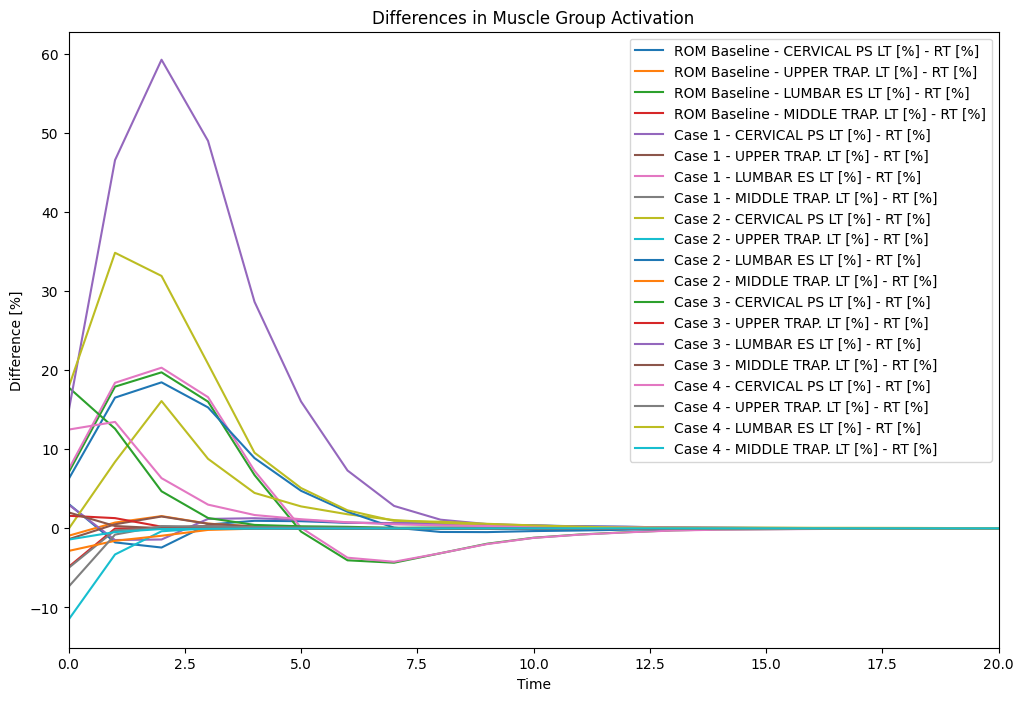

In [20]:
# Load the differences datasets
Leigh_differences_ROM = pd.read_csv('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Harvard Data\\Leigh\\Leigh_differences_ROM.csv')
Leigh_differences_Case1 = pd.read_csv('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Harvard Data\\Leigh\\Leigh_differences_Case1.csv')
Leigh_differences_Case2 = pd.read_csv('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Harvard Data\\Leigh\\Leigh_differences_Case2.csv')
Leigh_differences_Case3 = pd.read_csv('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Harvard Data\\Leigh\\Leigh_differences_Case3.csv')
Leigh_differences_Case4 = pd.read_csv('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Harvard Data\\Leigh\\Leigh_differences_Case4.csv')

# Plot the differences for each case study
plt.figure(figsize=(12, 8))

# Plot for ROM Baseline
plt.plot(Leigh_differences_ROM['CERVICAL PS LT [%] - RT [%]'], label='ROM Baseline - CERVICAL PS LT [%] - RT [%]')
plt.plot(Leigh_differences_ROM['UPPER TRAP. LT [%] - RT [%]'], label='ROM Baseline - UPPER TRAP. LT [%] - RT [%]')
plt.plot(Leigh_differences_ROM['LUMBAR ES LT [%] - RT [%]'], label='ROM Baseline - LUMBAR ES LT [%] - RT [%]')
plt.plot(Leigh_differences_ROM['MIDDLE TRAP. LT [%] - RT [%]'], label='ROM Baseline - MIDDLE TRAP. LT [%] - RT [%]')

# Plot for Case 1
plt.plot(Leigh_differences_Case1['CERVICAL PS LT [%] - RT [%]'], label='Case 1 - CERVICAL PS LT [%] - RT [%]')
plt.plot(Leigh_differences_Case1['UPPER TRAP. LT [%] - RT [%]'], label='Case 1 - UPPER TRAP. LT [%] - RT [%]')
plt.plot(Leigh_differences_Case1['LUMBAR ES LT [%] - RT [%]'], label='Case 1 - LUMBAR ES LT [%] - RT [%]')
plt.plot(Leigh_differences_Case1['MIDDLE TRAP. LT [%] - RT [%]'], label='Case 1 - MIDDLE TRAP. LT [%] - RT [%]')

# Plot for Case 2
plt.plot(Leigh_differences_Case2['CERVICAL PS LT [%] - RT [%]'], label='Case 2 - CERVICAL PS LT [%] - RT [%]')
plt.plot(Leigh_differences_Case2['UPPER TRAP. LT [%] - RT [%]'], label='Case 2 - UPPER TRAP. LT [%] - RT [%]')
plt.plot(Leigh_differences_Case2['LUMBAR ES LT [%] - RT [%]'], label='Case 2 - LUMBAR ES LT [%] - RT [%]')
plt.plot(Leigh_differences_Case2['MIDDLE TRAP. LT [%] - RT [%]'], label='Case 2 - MIDDLE TRAP. LT [%] - RT [%]')

# Plot for Case 3
plt.plot(Leigh_differences_Case3['CERVICAL PS LT [%] - RT [%]'], label='Case 3 - CERVICAL PS LT [%] - RT [%]')
plt.plot(Leigh_differences_Case3['UPPER TRAP. LT [%] - RT [%]'], label='Case 3 - UPPER TRAP. LT [%] - RT [%]')
plt.plot(Leigh_differences_Case3['LUMBAR ES LT [%] - RT [%]'], label='Case 3 - LUMBAR ES LT [%] - RT [%]')
plt.plot(Leigh_differences_Case3['MIDDLE TRAP. LT [%] - RT [%]'], label='Case 3 - MIDDLE TRAP. LT [%] - RT [%]')

# Plot for Case 4
plt.plot(Leigh_differences_Case4['CERVICAL PS LT [%] - RT [%]'], label='Case 4 - CERVICAL PS LT [%] - RT [%]')
plt.plot(Leigh_differences_Case4['UPPER TRAP. LT [%] - RT [%]'], label='Case 4 - UPPER TRAP. LT [%] - RT [%]')
plt.plot(Leigh_differences_Case4['LUMBAR ES LT [%] - RT [%]'], label='Case 4 - LUMBAR ES LT [%] - RT [%]')
plt.plot(Leigh_differences_Case4['MIDDLE TRAP. LT [%] - RT [%]'], label='Case 4 - MIDDLE TRAP. LT [%] - RT [%]')


plt.title('Differences in Muscle Group Activation')
plt.xlabel('Time')
plt.ylabel('Difference [%]')
plt.legend()
plt.xlim(0,20)
plt.show()

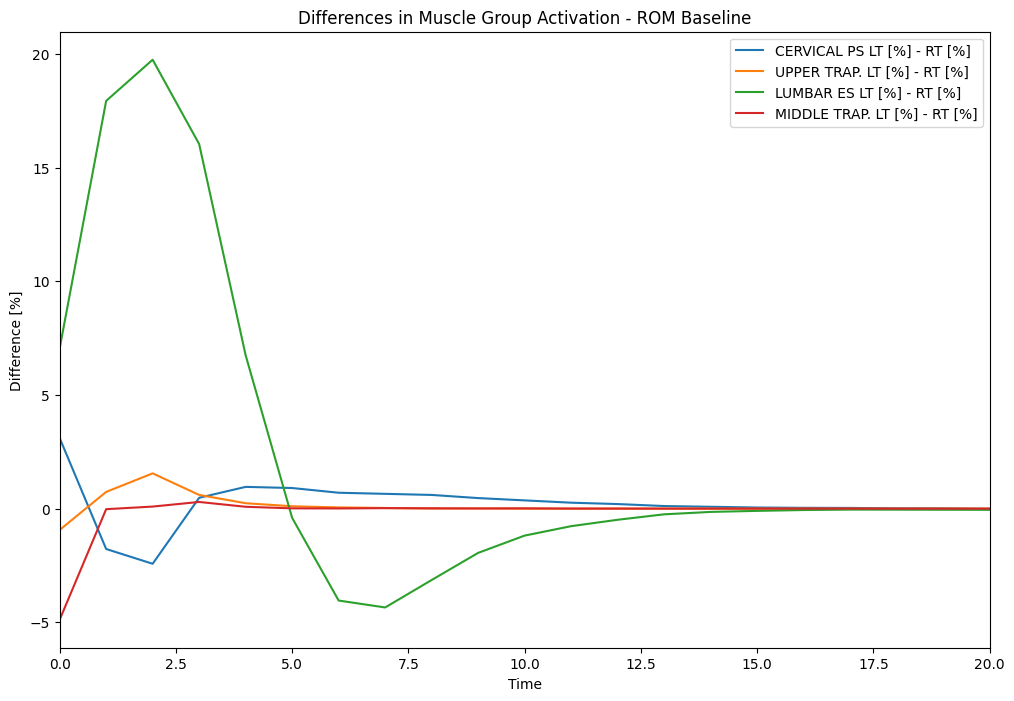

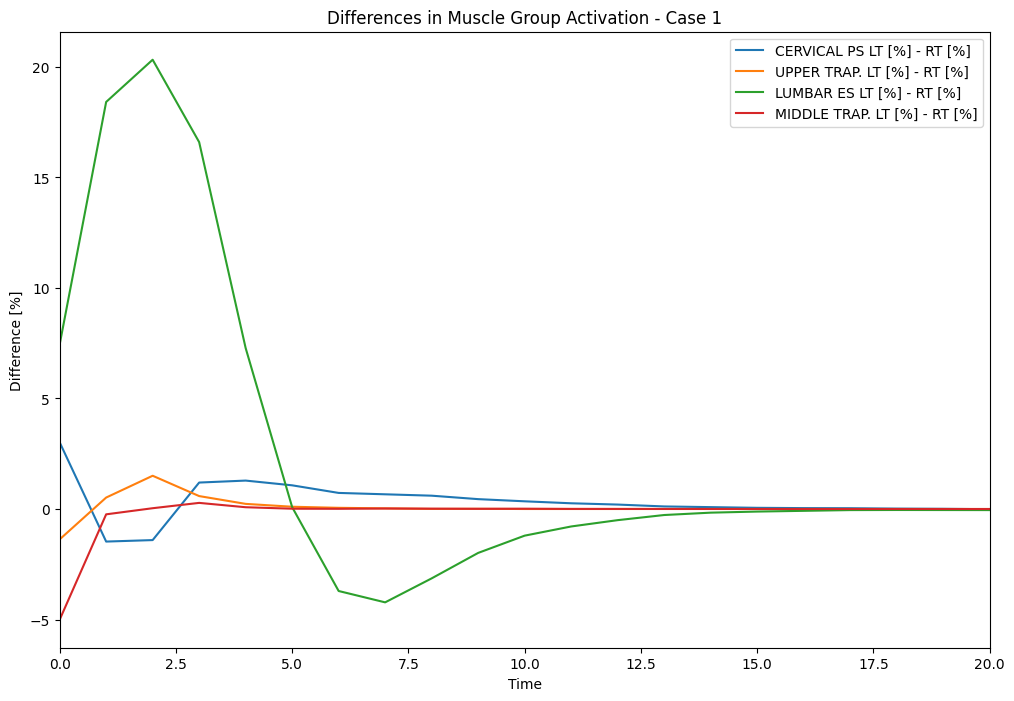

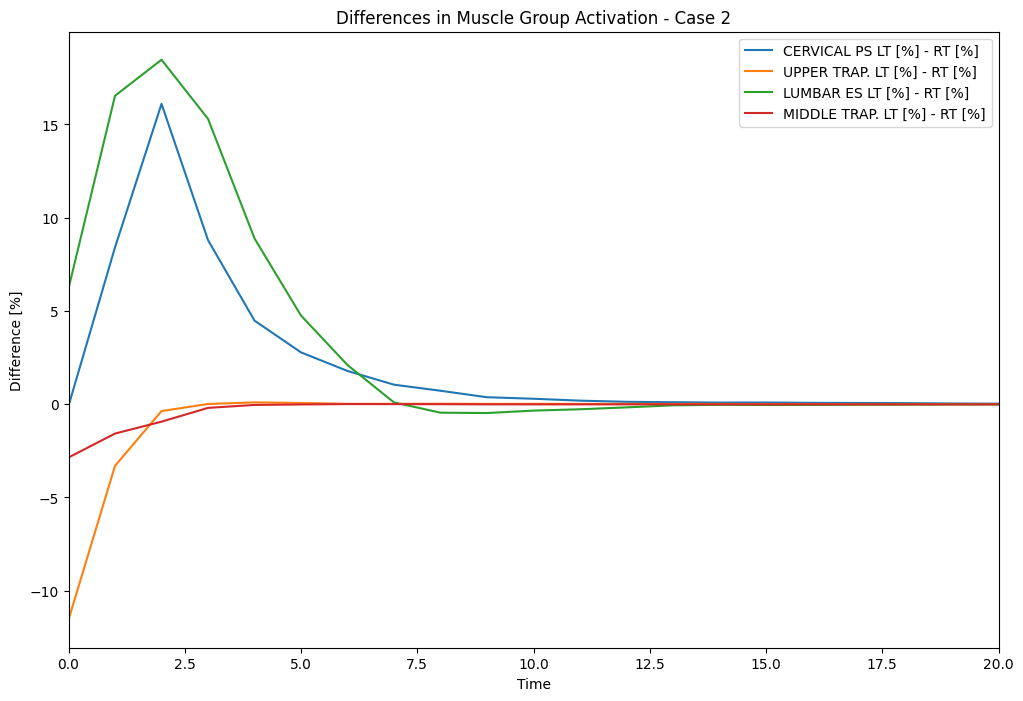

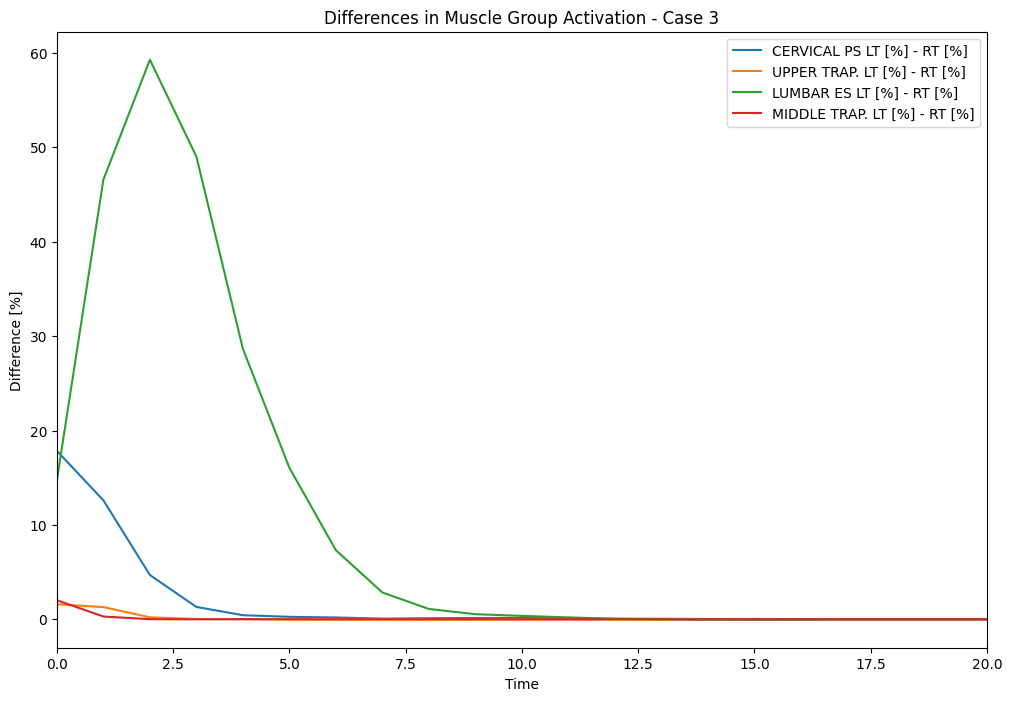

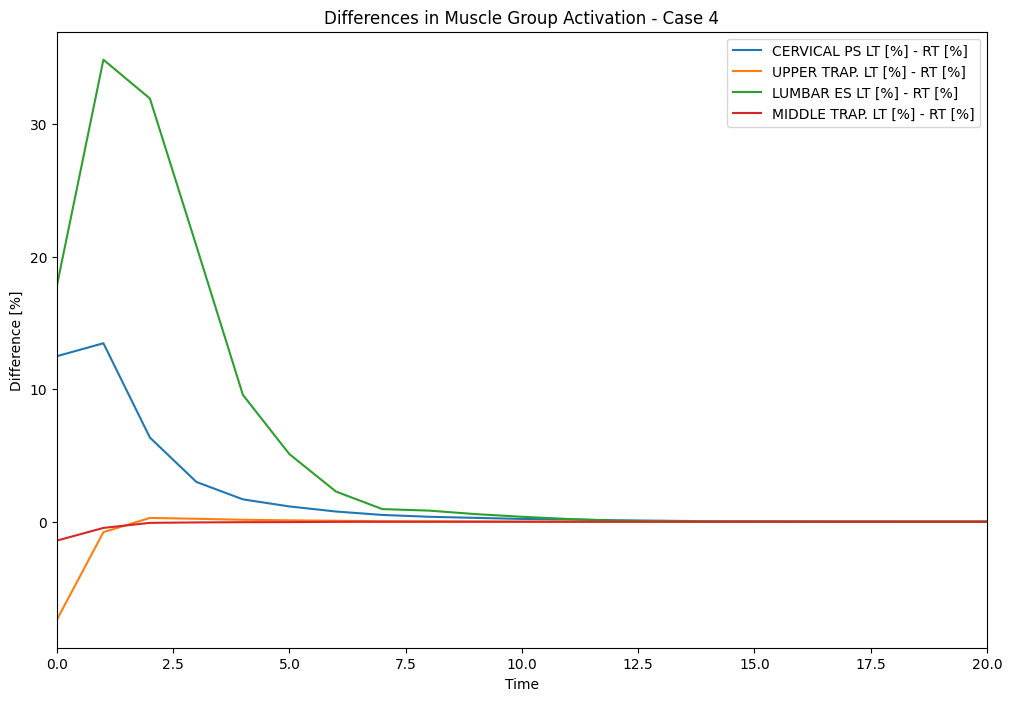

In [21]:
# Define a function to plot differences for each case
def plot_differences(differences, title):
    plt.figure(figsize=(12, 8))
    for column in differences.columns:
        plt.plot(differences[column], label=column)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Difference [%]')
    plt.legend()
    plt.xlim(0,20)
    plt.show()

# Plot differences for ROM Baseline
plot_differences(Leigh_differences_ROM, 'Differences in Muscle Group Activation - ROM Baseline')

# Plot differences for Case 1
plot_differences(Leigh_differences_Case1, 'Differences in Muscle Group Activation - Case 1')

# Plot differences for Case 2
plot_differences(Leigh_differences_Case2, 'Differences in Muscle Group Activation - Case 2')

# Plot differences for Case 3
plot_differences(Leigh_differences_Case3, 'Differences in Muscle Group Activation - Case 3')

# Plot differences for Case 4
plot_differences(Leigh_differences_Case4, 'Differences in Muscle Group Activation - Case 4')

C:\Users\jrzem\AppData\Local\Temp\ipykernel_11232\2588710876.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Case 1', 'Case 2', 'Case 3', 'Case 4'])


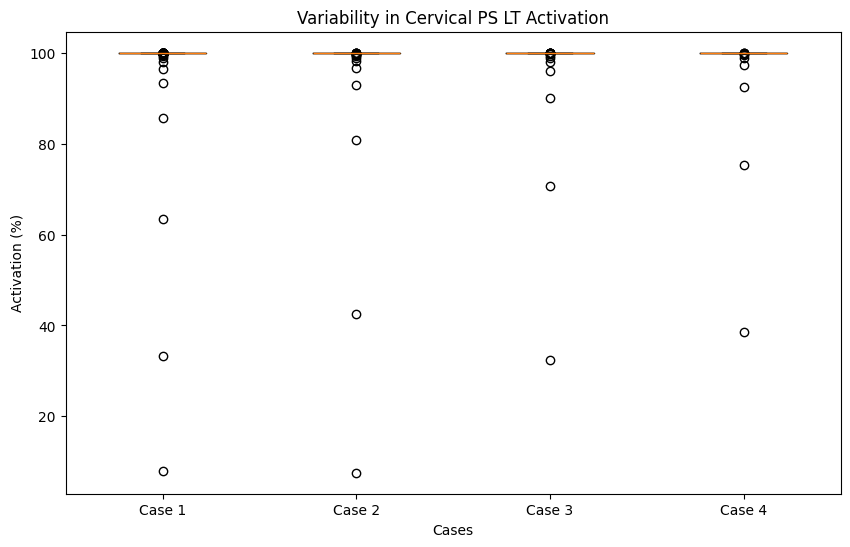

In [22]:
# Box plot to show variability across cases for Cervical PS LT
data = [case_1_pd_density['CERVICAL PS LT [%]'].dropna(),
        case_2_pd_density['CERVICAL PS LT [%]'].dropna(), 
        case_3_pd_density['CERVICAL PS LT [%]'].dropna(), 
        case_4_pd_density['CERVICAL PS LT [%]'].dropna()]

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['Case 1', 'Case 2', 'Case 3', 'Case 4'])
plt.title('Variability in Cervical PS LT Activation')
plt.ylabel('Activation (%)')
plt.xlabel('Cases')
plt.show()


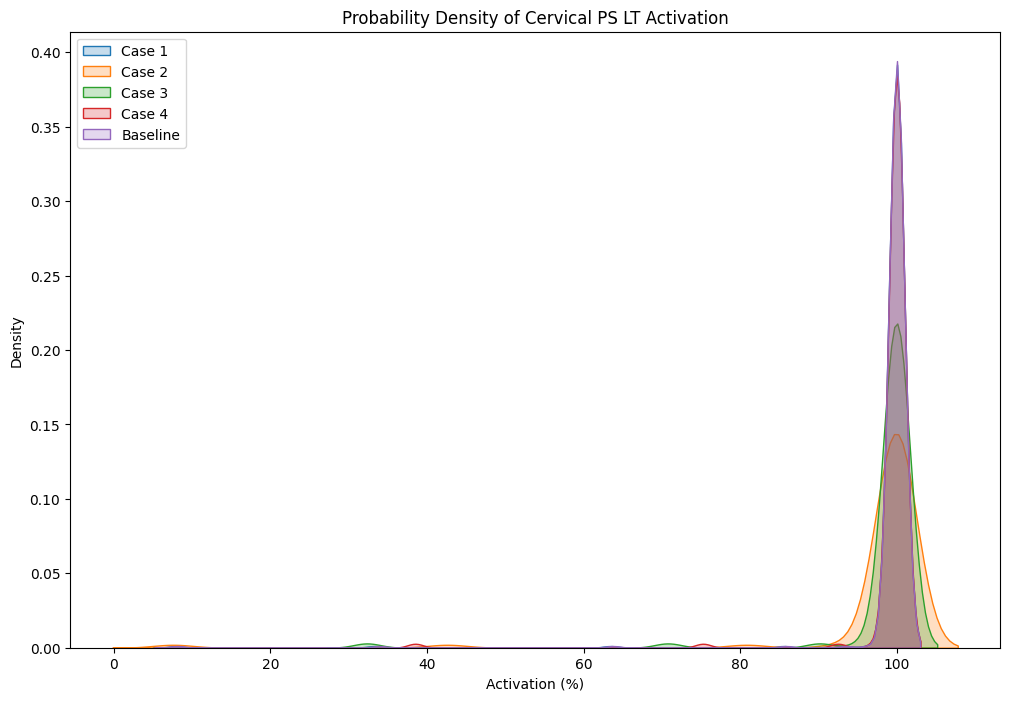

In [23]:
# KDE plot for Cervical PS LT activation
plt.figure(figsize=(12, 8))
sns.kdeplot(case_1_pd_density['CERVICAL PS LT [%]'].dropna(), label='Case 1', bw_adjust=0.5, fill=True)
sns.kdeplot(case_2_pd_density['CERVICAL PS LT [%]'].dropna(), label='Case 2', bw_adjust=0.5, fill=True)
sns.kdeplot(case_3_pd_density['CERVICAL PS LT [%]'].dropna(), label='Case 3', bw_adjust=0.5, fill=True)
sns.kdeplot(case_4_pd_density['CERVICAL PS LT [%]'].dropna(), label='Case 4', bw_adjust=0.5, fill=True)
sns.kdeplot(ROM_Baseline_pd_density['CERVICAL PS LT [%]'].dropna(), label='Baseline', bw_adjust=0.5, fill=True)
plt.title('Probability Density of Cervical PS LT Activation')
plt.xlabel('Activation (%)')
plt.ylabel('Density')
plt.legend()
plt.show()


This appears to be the same value types for each muscle group.

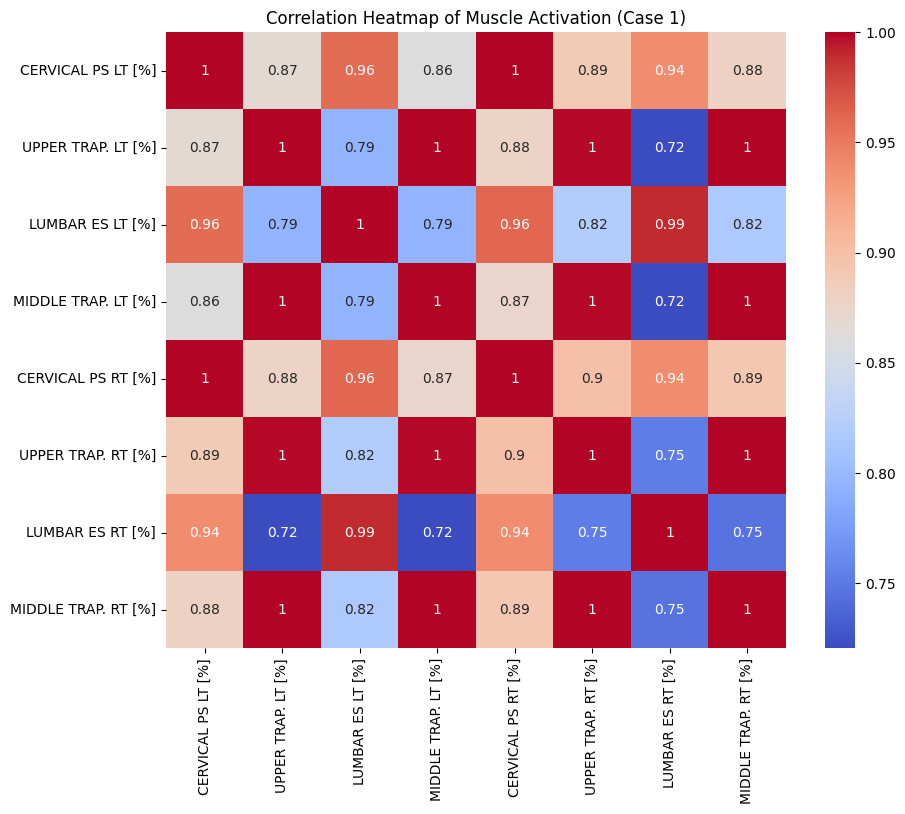

In [24]:
# Correlation heatmap of muscle activation data for Case 1
plt.figure(figsize=(10, 8))
sns.heatmap(case_1_pd_density[variables_LT + variables_RT].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Muscle Activation (Case 1)')
plt.show()


Now looking at some clustering potential of the data.

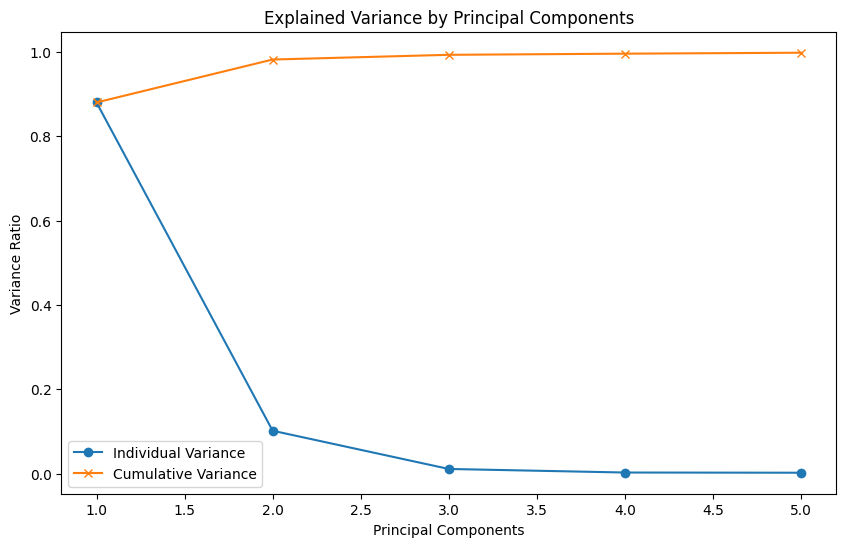

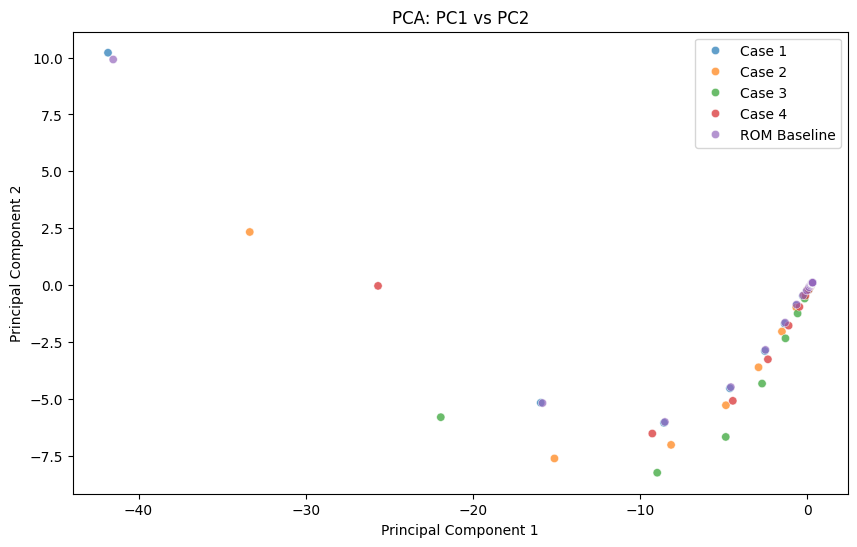

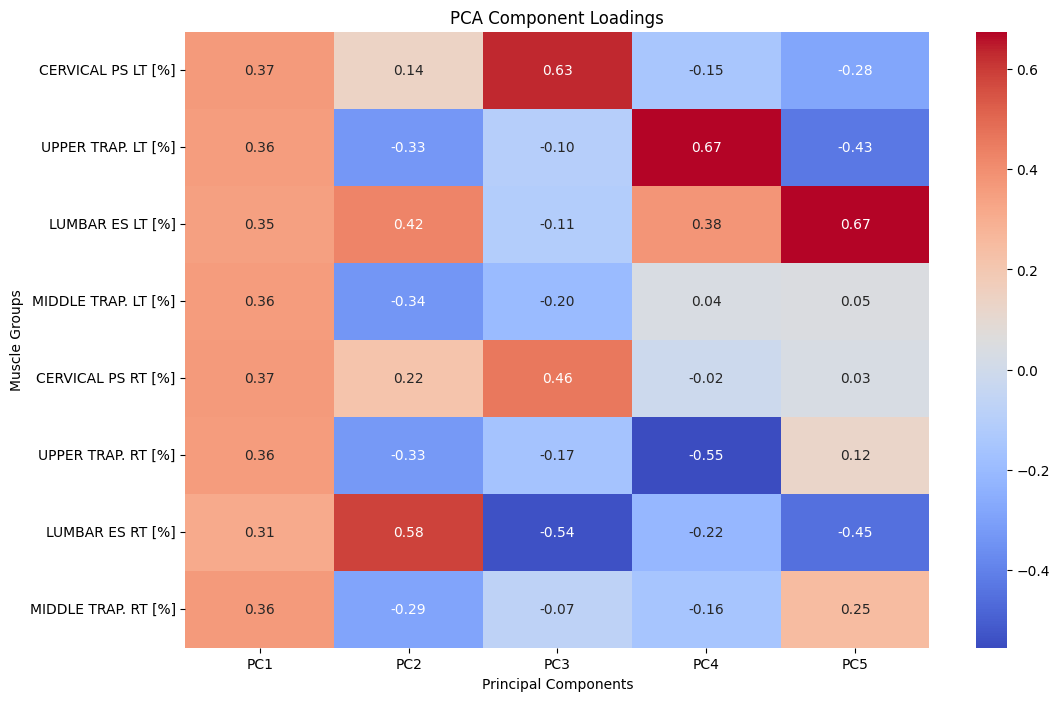

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine datasets
muscle_data = pd.concat([case_1_pd_density[variables_LT + variables_RT],
                         case_2_pd_density[variables_LT + variables_RT],
                         case_3_pd_density[variables_LT + variables_RT],
                         case_4_pd_density[variables_LT + variables_RT],
                         ROM_Baseline_pd_density[variables_LT + variables_RT]])

# Standardize the data
scaler = StandardScaler()
muscle_data_scaled = scaler.fit_transform(muscle_data.dropna())

# Perform PCA
pca = PCA(n_components=5)  # Set components to explore more PCs
principal_components = pca.fit_transform(muscle_data_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(5)])

# Add case labels for visualization
cases = ['Case 1'] * len(case_1_pd_density) + ['Case 2'] * len(case_2_pd_density) + ['Case 3'] * len(case_3_pd_density) + ['Case 4'] * len(case_4_pd_density) + ['ROM Baseline'] * len(ROM_Baseline_pd_density)
cases = cases[:len(pca_df)]  # Ensure the labels match the rows in pca_df
pca_df['Case'] = cases

# Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label='Individual Variance')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='x', label='Cumulative Variance')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.legend()
plt.show()

# PCA Scatter Plot (PC1 vs. PC2)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Case', palette='tab10', alpha=0.7)
plt.title('PCA: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Component Loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(5)], index=muscle_data.columns)

# Heatmap of loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('PCA Component Loadings')
plt.ylabel('Muscle Groups')
plt.xlabel('Principal Components')
plt.show()


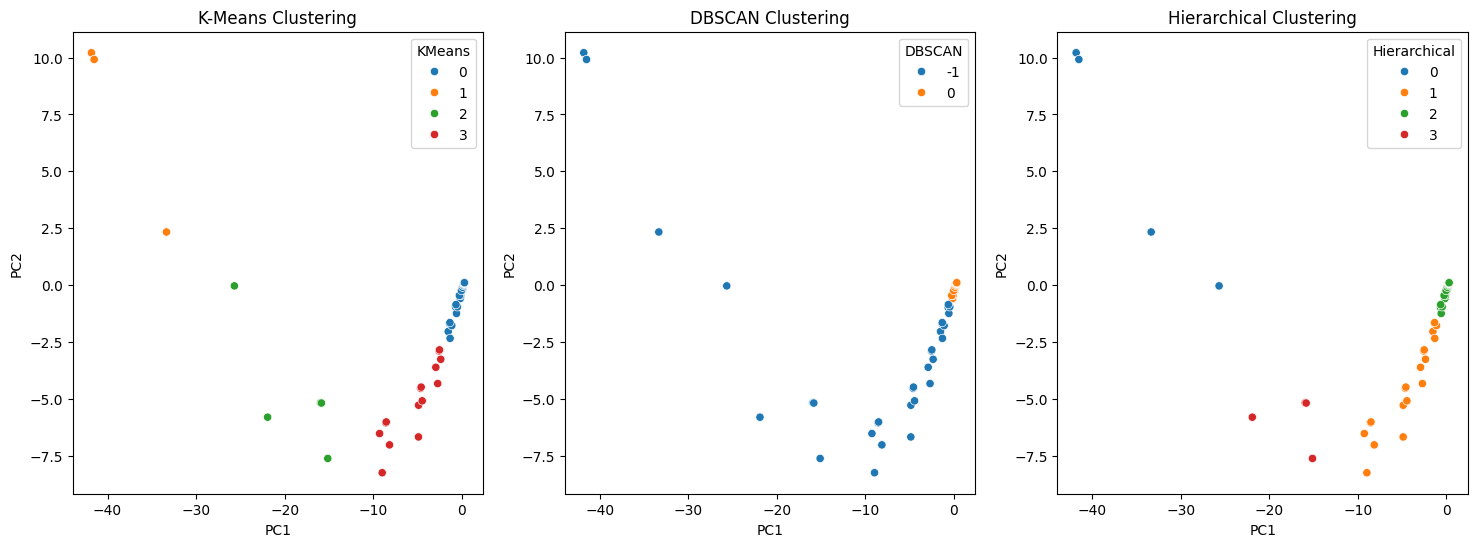

K-Means Silhouette Score: 0.9774040927604501
DBSCAN Silhouette Score: 0.9563771835786021
Hierarchical Clustering Silhouette Score: 0.9732469571106527


In [26]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns

import matplotlib.pyplot as plt

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(muscle_data_scaled)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(muscle_data_scaled)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(muscle_data_scaled)

# Add cluster labels to the PCA DataFrame for visualization
pca_df['KMeans'] = kmeans_labels
pca_df['DBSCAN'] = dbscan_labels
pca_df['Hierarchical'] = hierarchical_labels

# Plotting the clusters using PCA components
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='KMeans', palette='tab10', ax=axes[0])
axes[0].set_title('K-Means Clustering')

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='DBSCAN', palette='tab10', ax=axes[1])
axes[1].set_title('DBSCAN Clustering')

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Hierarchical', palette='tab10', ax=axes[2])
axes[2].set_title('Hierarchical Clustering')

plt.show()

# Calculate silhouette scores for each clustering method
kmeans_silhouette = silhouette_score(muscle_data_scaled, kmeans_labels)
dbscan_silhouette = silhouette_score(muscle_data_scaled, dbscan_labels)
hierarchical_silhouette = silhouette_score(muscle_data_scaled, hierarchical_labels)

print(f'K-Means Silhouette Score: {kmeans_silhouette}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}')

All methods of clustering assessed appear to work very well. This is interesting to consider, but there are other things that we want to look at.

# Focused Analysis

- We want to see a fatigue effect and the relation to maximal contraction.
- Some ratio created from the range of motion baseline datasets.
- Look at asymmetry in range and in activity.
- The ROM baseline data are the absolute ranges, and then percent of range with kinematic data. 
- Look at an accumulation of the data for ROM baseline. See the effort and that might be a frequency count or additive count. 
- Look at a person's available range, because they have a discrepancy in asymmetry and tendency to move ot the right too much for instance. This is an ergonomic discovery.
- For the abstract, we need lead vs. no lead and the EMG differences in range for that.
- Look at the neck range of motion data. The forward flexion might not be that useful. How much did they stay in the same position and that can be fatiguing as well (this considers that the vest is restricting potentially). The more movement in cervical and less in the lumbar spine.
- We also want group averages and to take the ratios data and come up with a group ratio. Look at if they were all greater than 50% of the available range when they turned to a certain area. In the presentation, we can show what these surgeons are going through during surgery.
- Look at case 1 as a proof of concept, the range, teh EMG (percent wtih the bar graph over time)
- Pull the baseline data and do percent of range of activity and available range. Look at the activity range over availability range.
- We need to get the numbers and make it general enough to submit for January 12 deadline. 
- If we see that the data is skewed to the left or the right, we can see how much they are into their rotation. The average range of a worker is important. The average tech surgeon has certain degrees of motion compared to normal people. Are they starting off with poor posture? Look and find the normative data if there is any.
- Absolute measures are important along with the averages of the people as well. 
- We can't standardize data because everyone is of different height. We could covariate height through. Looking at confounding measures of height. How could that change while in lead or not in lead. Find what heights the individuals are and look at the differences there. Seek confounding factors.
- Is the lead vest a problem? Whether it is safer or not, could it be an ergonomic issue?
- Answer the easy questions first:
    - ROM within between subjects per condition. The range data is more important than the EMG data. We don't have a max volitional condition that we can see. 
    - We can show the ROM on the screen of Noraxon as well and showcase the EMG data later.


We are going to see how subjects do with the lead vs. rampart for all. Then, compare why some may have done better than others.

In [27]:
# read in the data for kinematics 1
kinematics_1 = pd.read_excel('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Harvard Data\\Leigh\\Leigh_case1.xlsx', sheet_name='Kinematics 1')
kinematics_2 = pd.read_excel('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Harvard Data\\Leigh\\Leigh_case2_leadexcel.xlsx', sheet_name='Kinematics 2')
kinematics_3 = pd.read_excel('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Harvard Data\\Leigh\\Leigh_case3.xlsx', sheet_name='Kinematics 3')
kinematics_4 = pd.read_excel('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Harvard Data\\Leigh\\Leigh_case4.xlsx', sheet_name='Kinematics 4')
kinematics_ROM = pd.read_excel('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Harvard Data\\Leigh\\Leigh_ROMbaseline.xlsx', sheet_name='Kinematics ROM')

In [28]:
# Veiwing the data for kinematics 1
kinematics_1.head()

,Unnamed: 0,Cervical Flexion Fwd [deg],Cervical Flexion Lat LT [deg],Cervical Flexion Lat RT [deg],Cervical Axial LT [deg],Cervical Axial RT [deg],Torso-Pelvic Flexion Fwd [deg],Torso-Pelvic Flexion Lat LT [deg],Torso-Pelvic Flexion Lat RT [deg],Torso-Pelvic Axial LT [deg],...,Thoracic Flexion Fwd [deg],Thoracic Flexion Lat LT [deg],Thoracic Flexion Lat RT [deg],Thoracic Axial LT [deg],Thoracic Axial RT [deg],Lumbar Flexion Fwd [deg],Lumbar Flexion Lat LT [deg],Lumbar Flexion Lat RT [deg],Lumbar Axial LT [deg],Lumbar Axial RT [deg]
0,"Minimum, deg",-34.5800,-21.9992,-15.9536,-46.5585,-35.3153,-0.479433,-21.8024,-20.4605,-23.2806,...,-0.522298,-18.3507,-17.5865,-23.7137,-27.0336,-2.9805,-5.53145,-5.48880,-3.65532,-4.10281
1,"Maximum, deg",16.4025,15.9536,21.9992,35.3153,46.5585,30.529800,20.4605,21.8024,26.9395,...,23.175200,17.5865,18.3507,27.0336,23.7137,14.3100,5.48880,5.53145,4.10281,3.65532
2,"Range, deg",50.9825,37.9528,37.9528,81.8737,81.8737,31.009300,42.2629,42.2629,50.2201,...,23.697500,35.9372,35.9372,50.7473,50.7473,17.2905,11.02020,11.02020,7.75813,7.75813


1. Showcase a bar graph of the values.
2. Showcase a differences between the left and right for each case and plot.

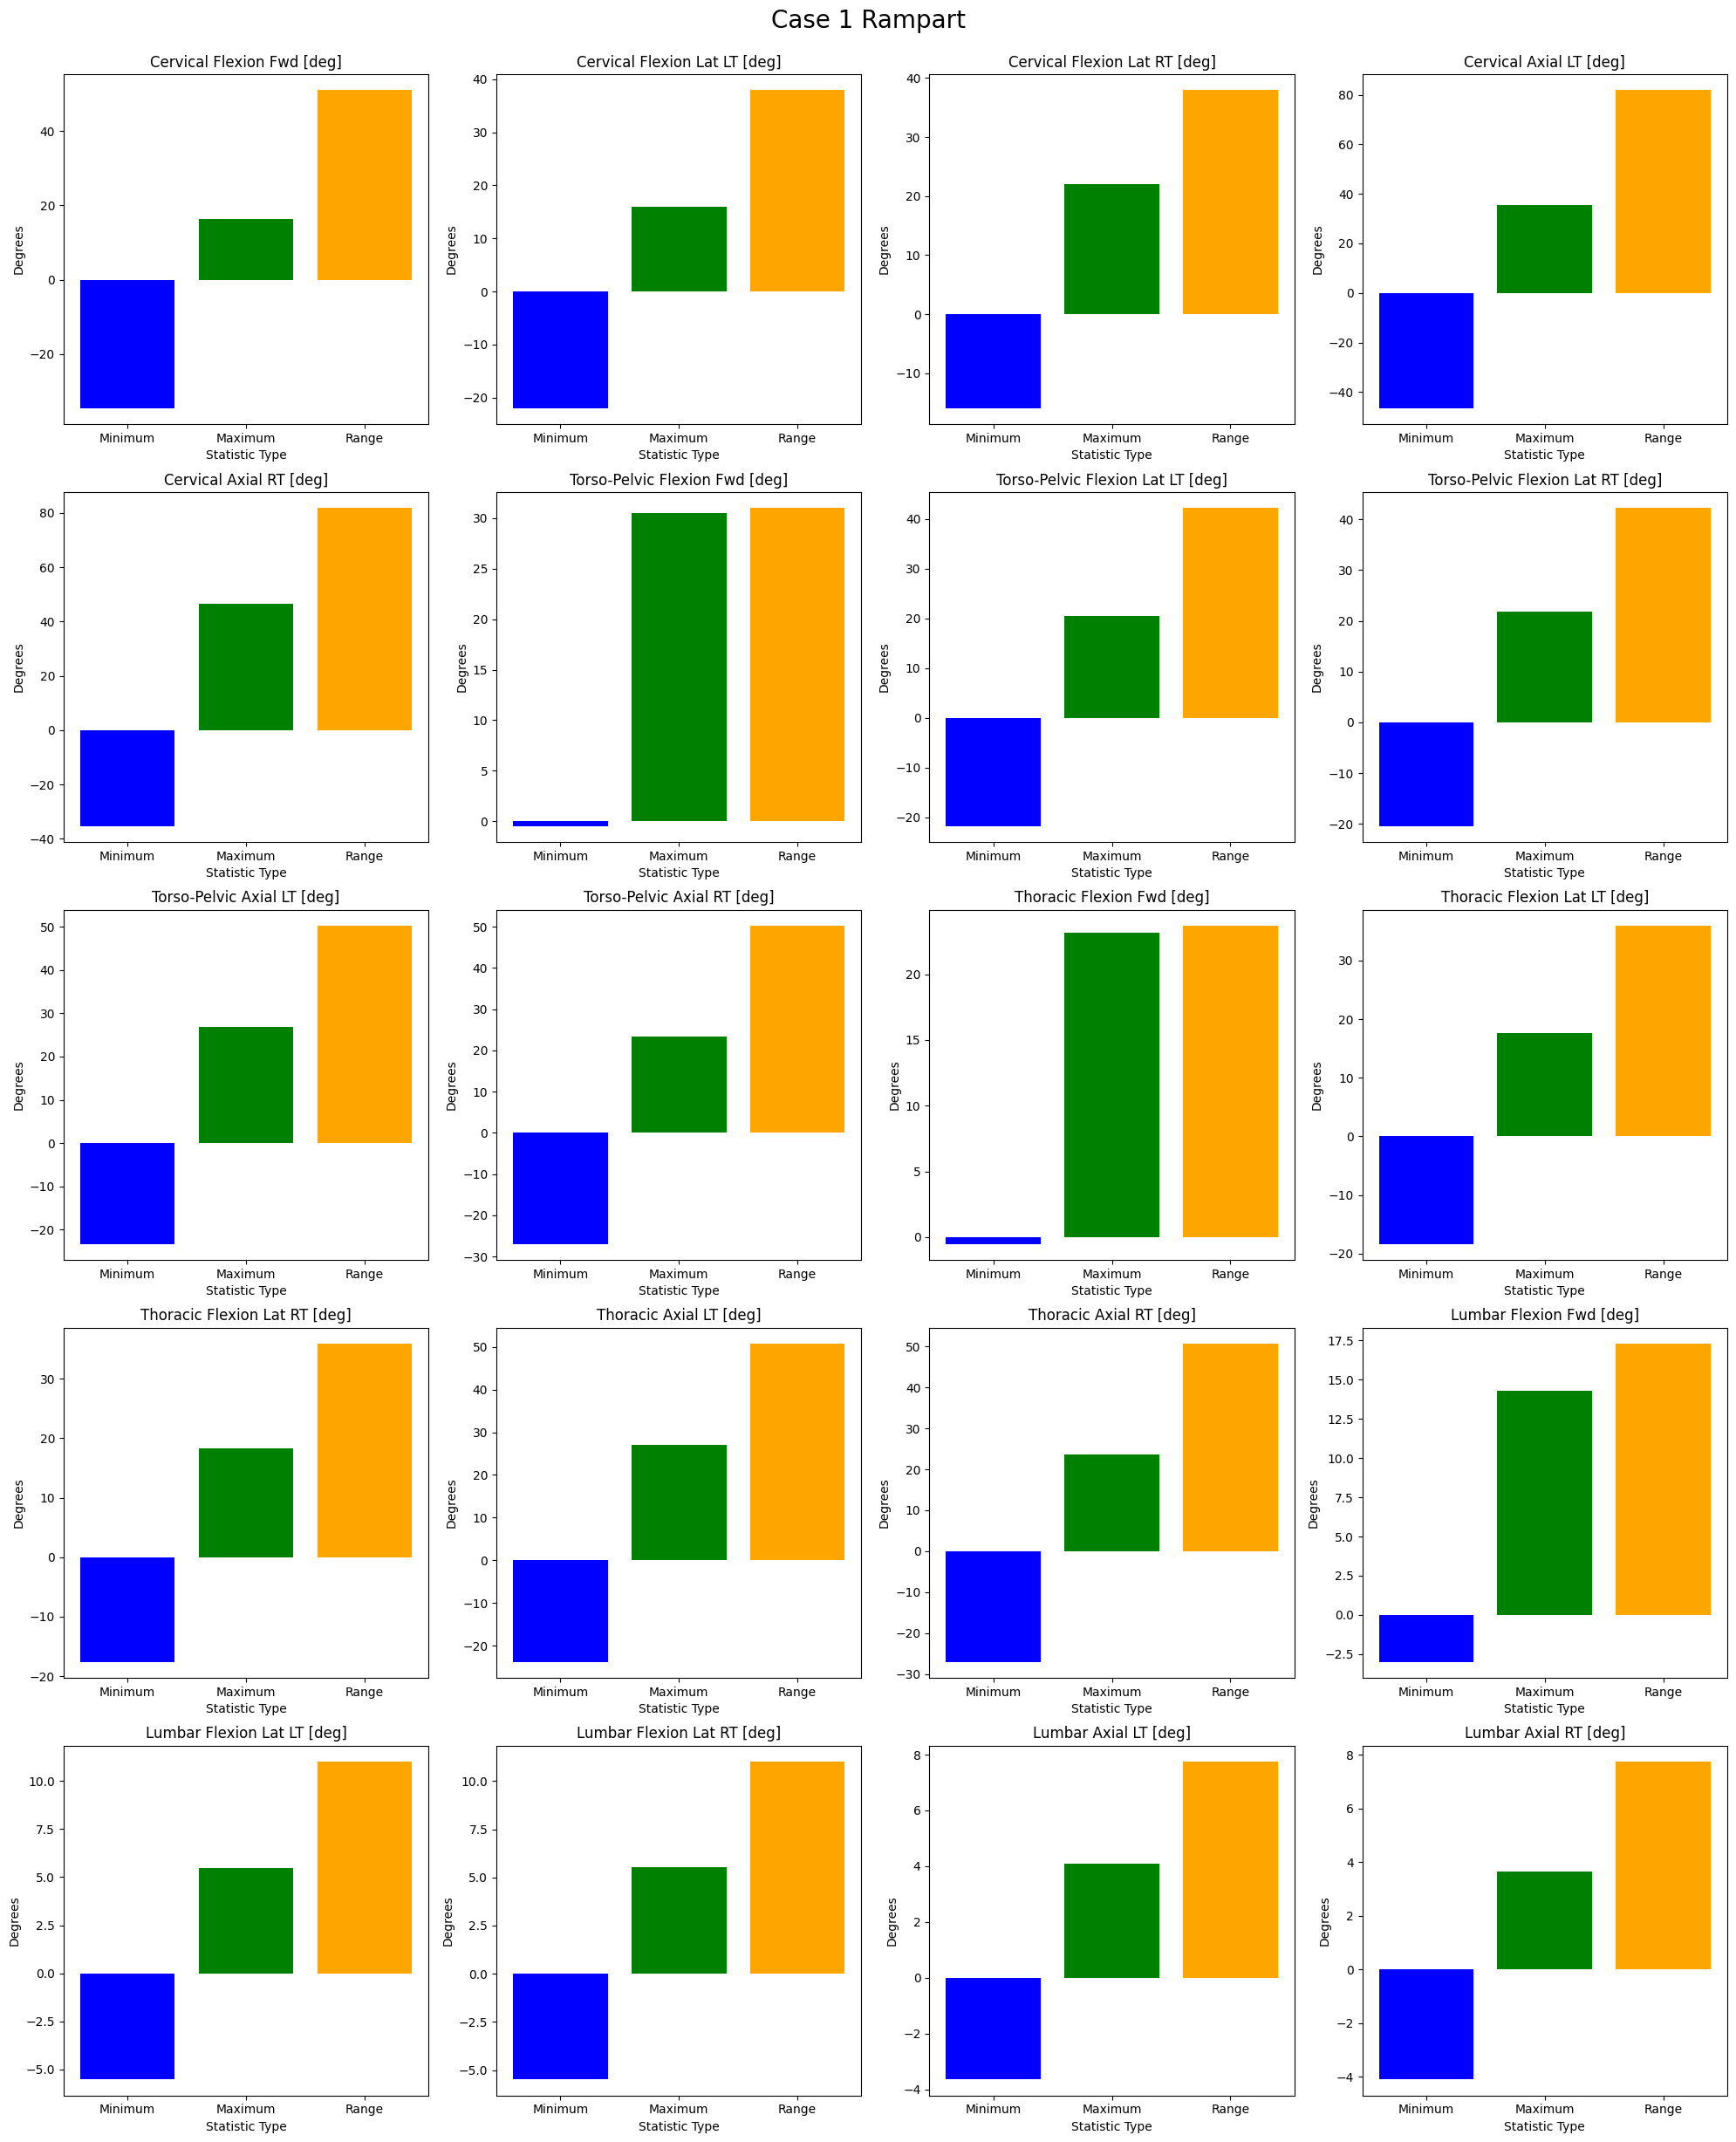

In [29]:
# Reshape the data: extract relevant information and structure for plotting
stats_data = kinematics_1.set_index(kinematics_1.columns[0]).T
stats_data.columns = ['Minimum', 'Maximum', 'Range']

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
axes = axes.flatten()

# Iterate through each degree type to plot individual graphs
degree_types = stats_data.index
for i, degree_type in enumerate(degree_types):
    axes[i].bar(['Minimum', 'Maximum', 'Range'], stats_data.loc[degree_type], color=['blue', 'green', 'orange'])
    axes[i].set_title(f'{degree_type}')
    axes[i].set_ylabel('Degrees')
    axes[i].set_xlabel('Statistic Type')

# Adjust layout and add a title to the figure
plt.tight_layout()
fig.suptitle('Case 1 Rampart', fontsize=20)
plt.subplots_adjust(top=0.95)  # Adjust the top to make room for the title
plt.show()

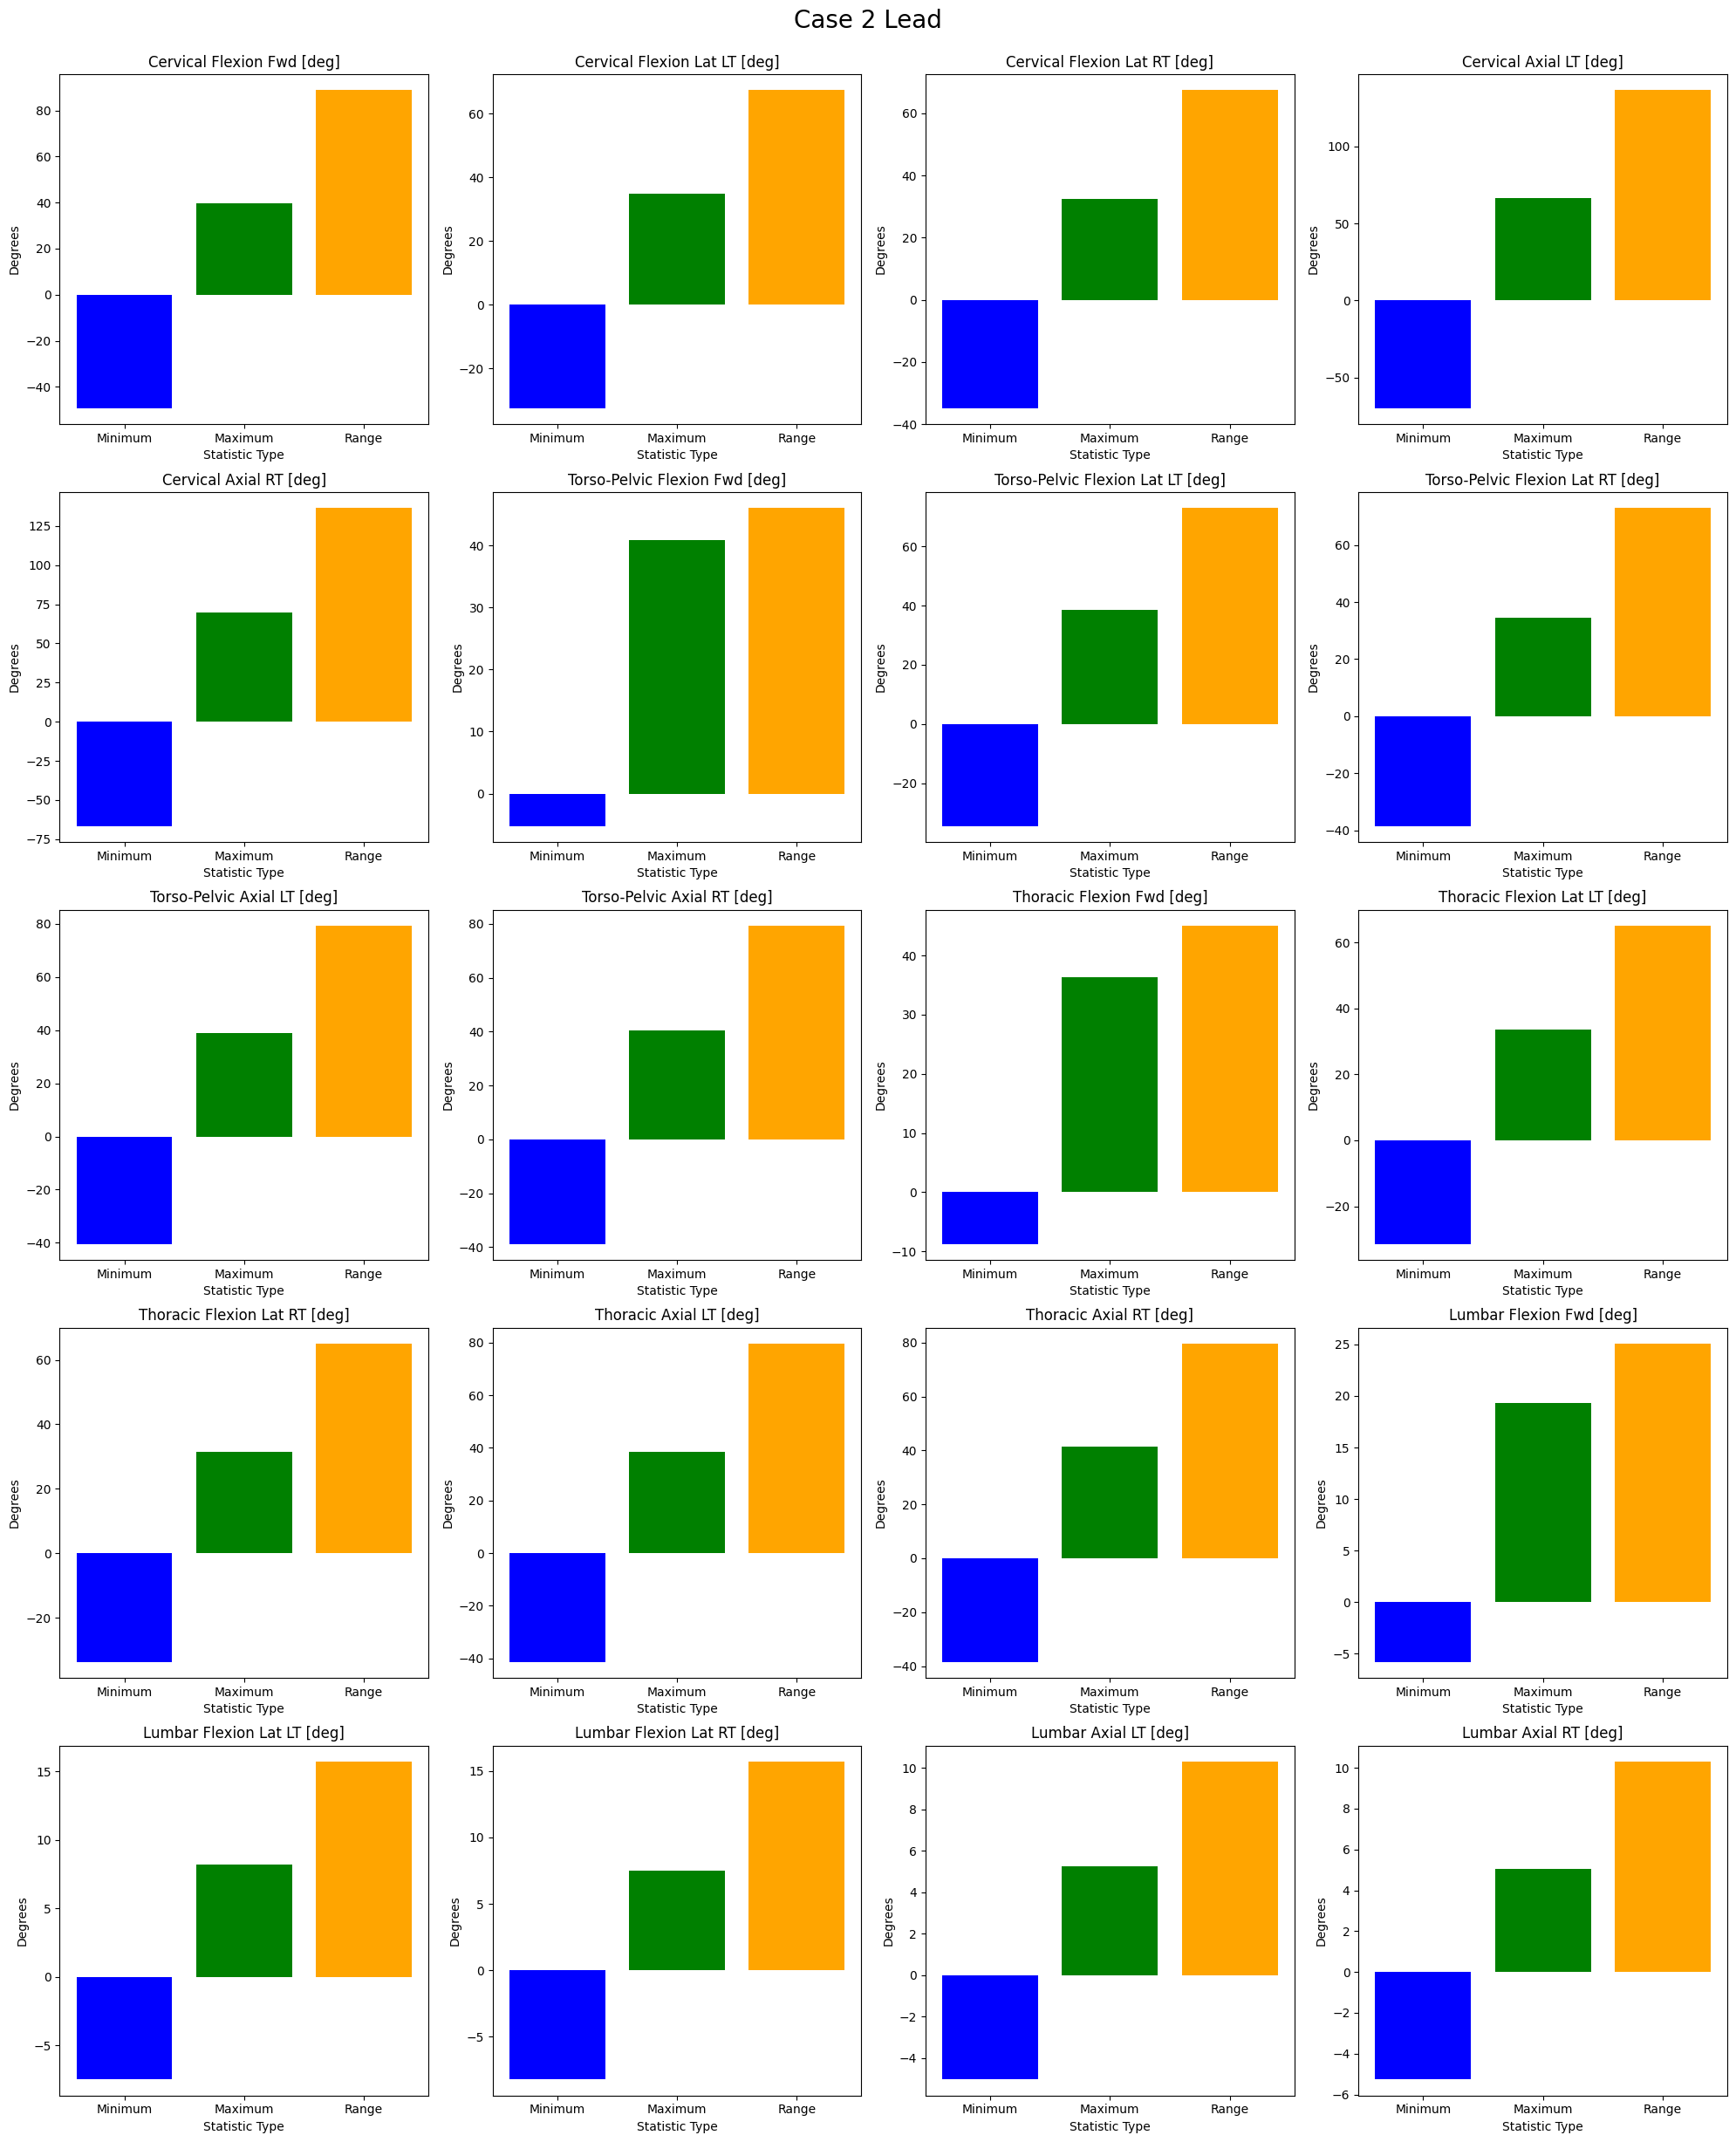

In [30]:
# Reshape the data: extract relevant information and structure for plotting
stats_data = kinematics_2.set_index(kinematics_2.columns[0]).T
stats_data.columns = ['Minimum', 'Maximum', 'Range']

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
axes = axes.flatten()

# Iterate through each degree type to plot individual graphs
degree_types = stats_data.index
for i, degree_type in enumerate(degree_types):
    axes[i].bar(['Minimum', 'Maximum', 'Range'], stats_data.loc[degree_type], color=['blue', 'green', 'orange'])
    axes[i].set_title(f'{degree_type}')
    axes[i].set_ylabel('Degrees')
    axes[i].set_xlabel('Statistic Type')

# Adjust layout and add a title to the figure
plt.tight_layout()
fig.suptitle('Case 2 Lead', fontsize=20)
plt.subplots_adjust(top=0.95)  # Adjust the top to make room for the title
plt.show()

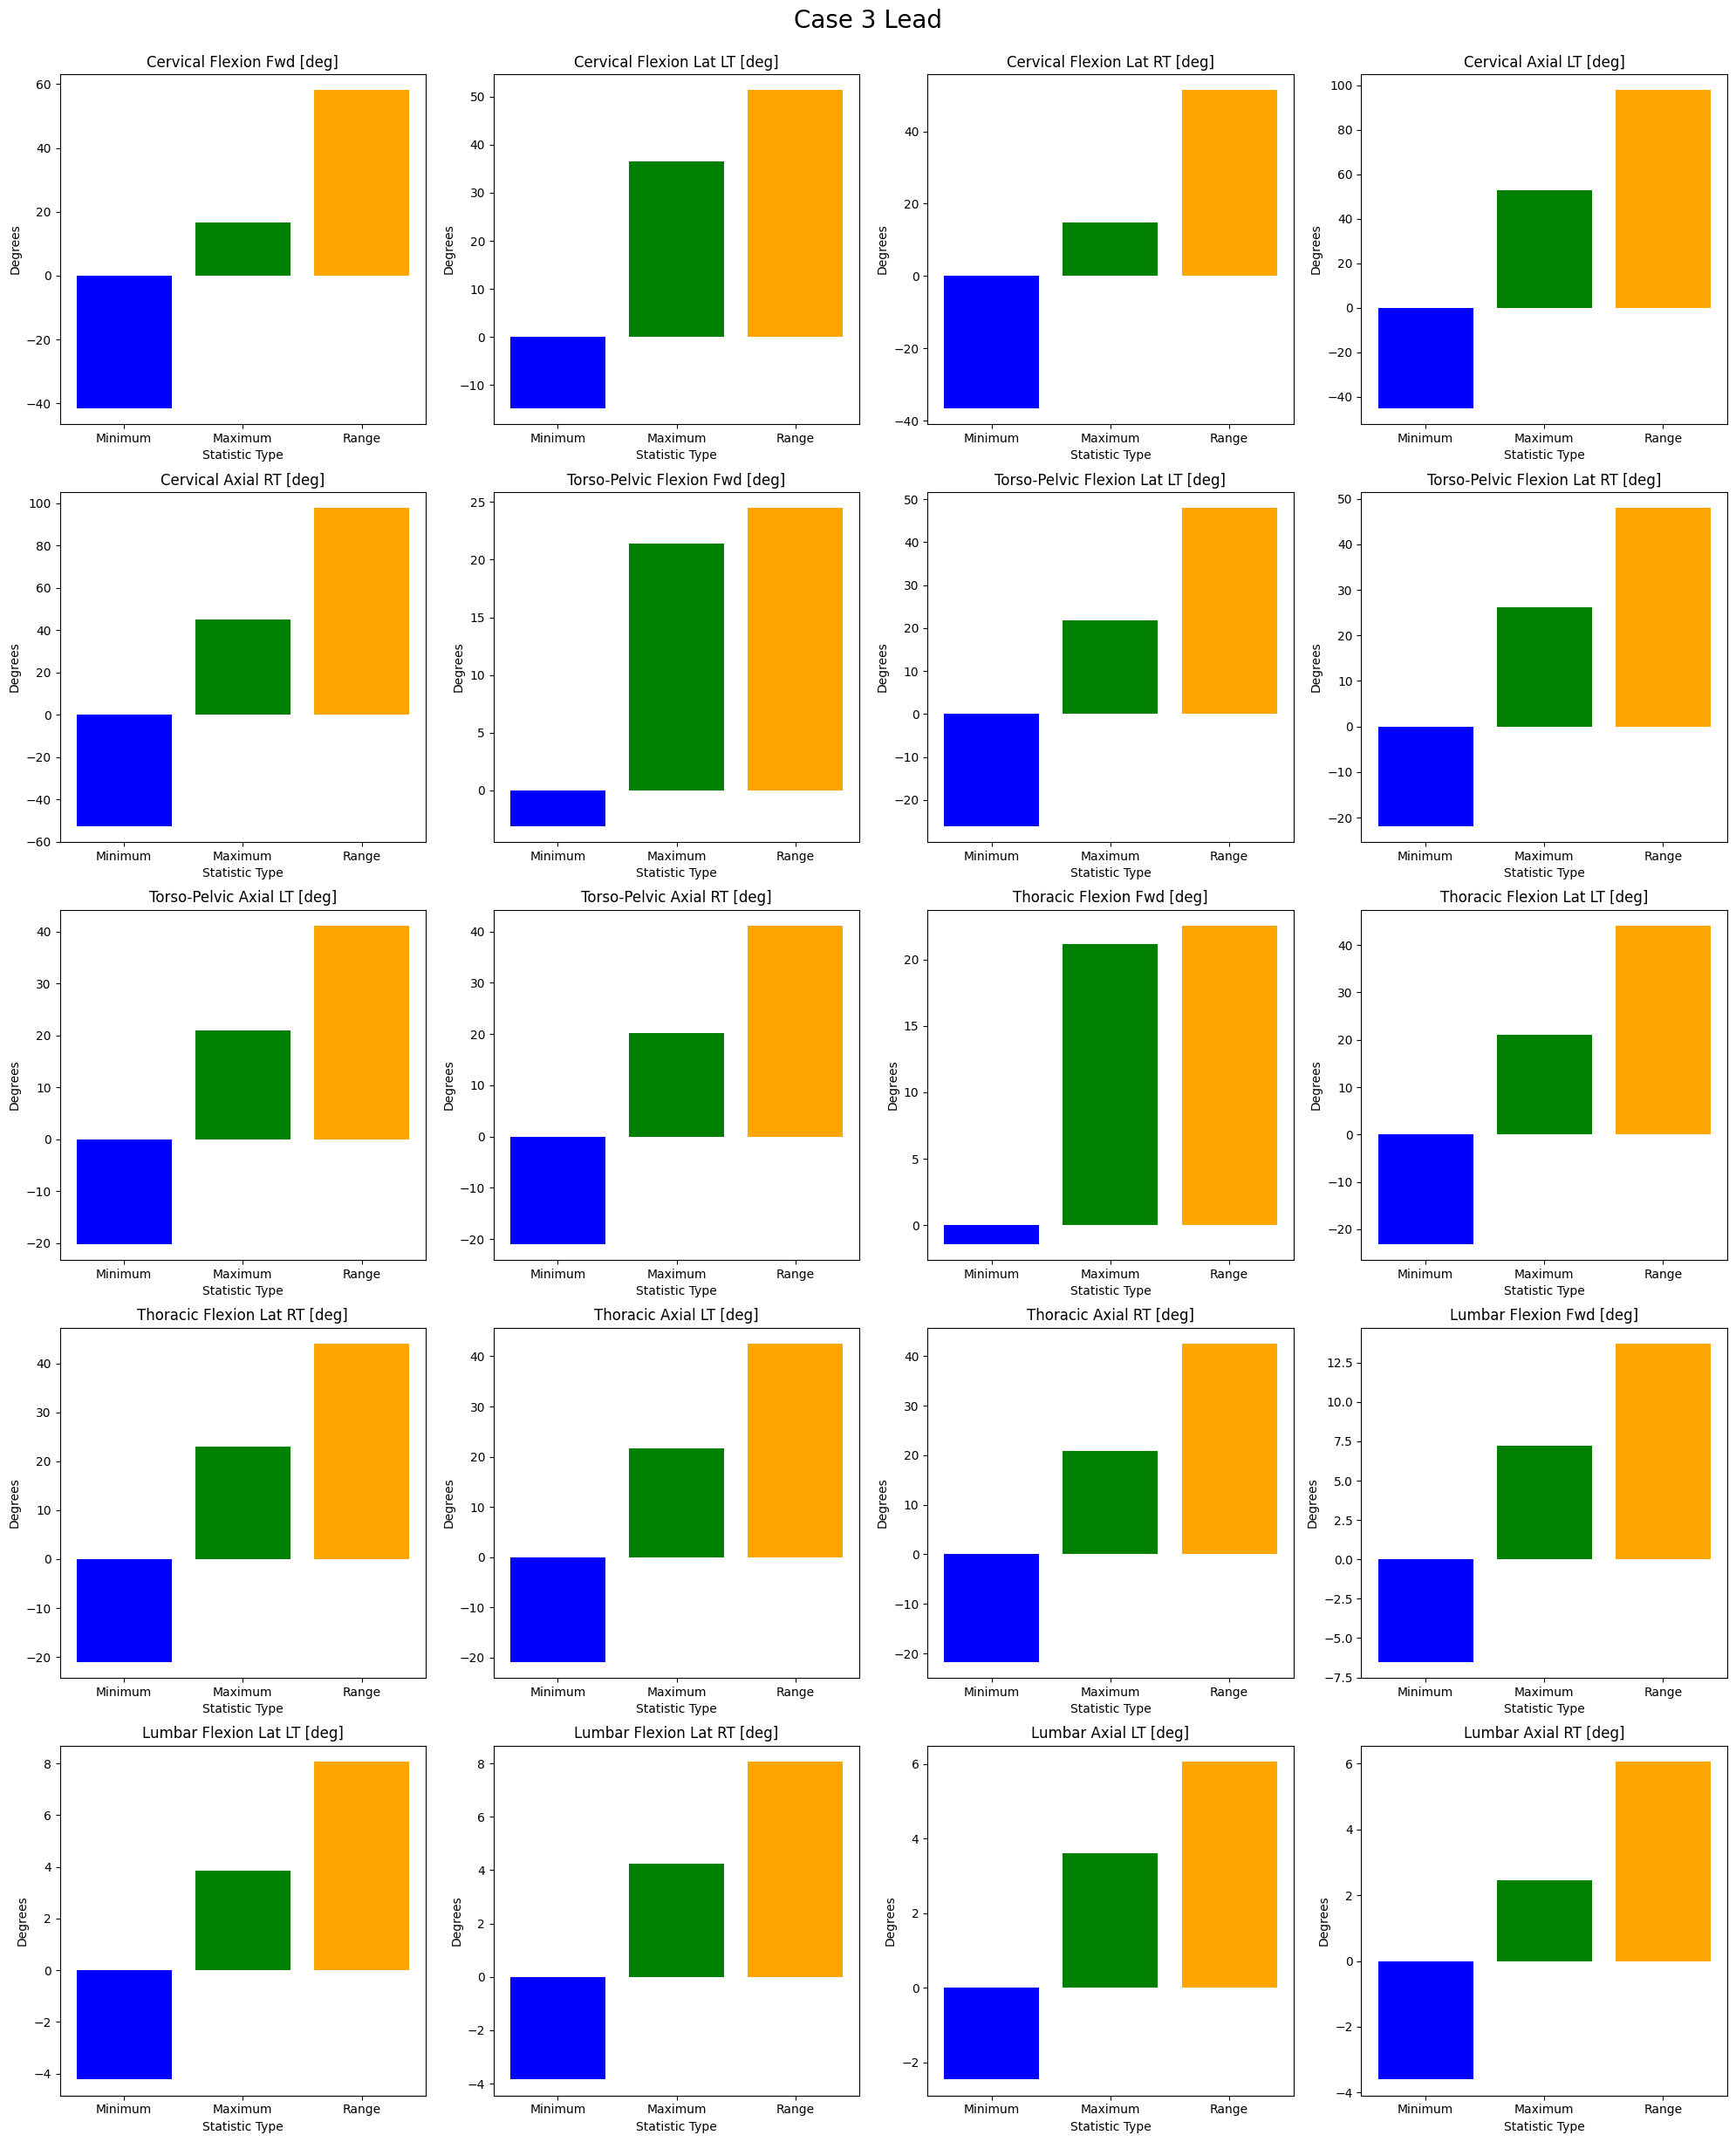

In [31]:
# Reshape the data: extract relevant information and structure for plotting
stats_data = kinematics_3.set_index(kinematics_3.columns[0]).T
stats_data.columns = ['Minimum', 'Maximum', 'Range']

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
axes = axes.flatten()

# Iterate through each degree type to plot individual graphs
degree_types = stats_data.index
for i, degree_type in enumerate(degree_types):
    axes[i].bar(['Minimum', 'Maximum', 'Range'], stats_data.loc[degree_type], color=['blue', 'green', 'orange'])
    axes[i].set_title(f'{degree_type}')
    axes[i].set_ylabel('Degrees')
    axes[i].set_xlabel('Statistic Type')

# Adjust layout and add a title to the figure
plt.tight_layout()
fig.suptitle('Case 3 Lead', fontsize=20)
plt.subplots_adjust(top=0.95)  # Adjust the top to make room for the title
plt.show()

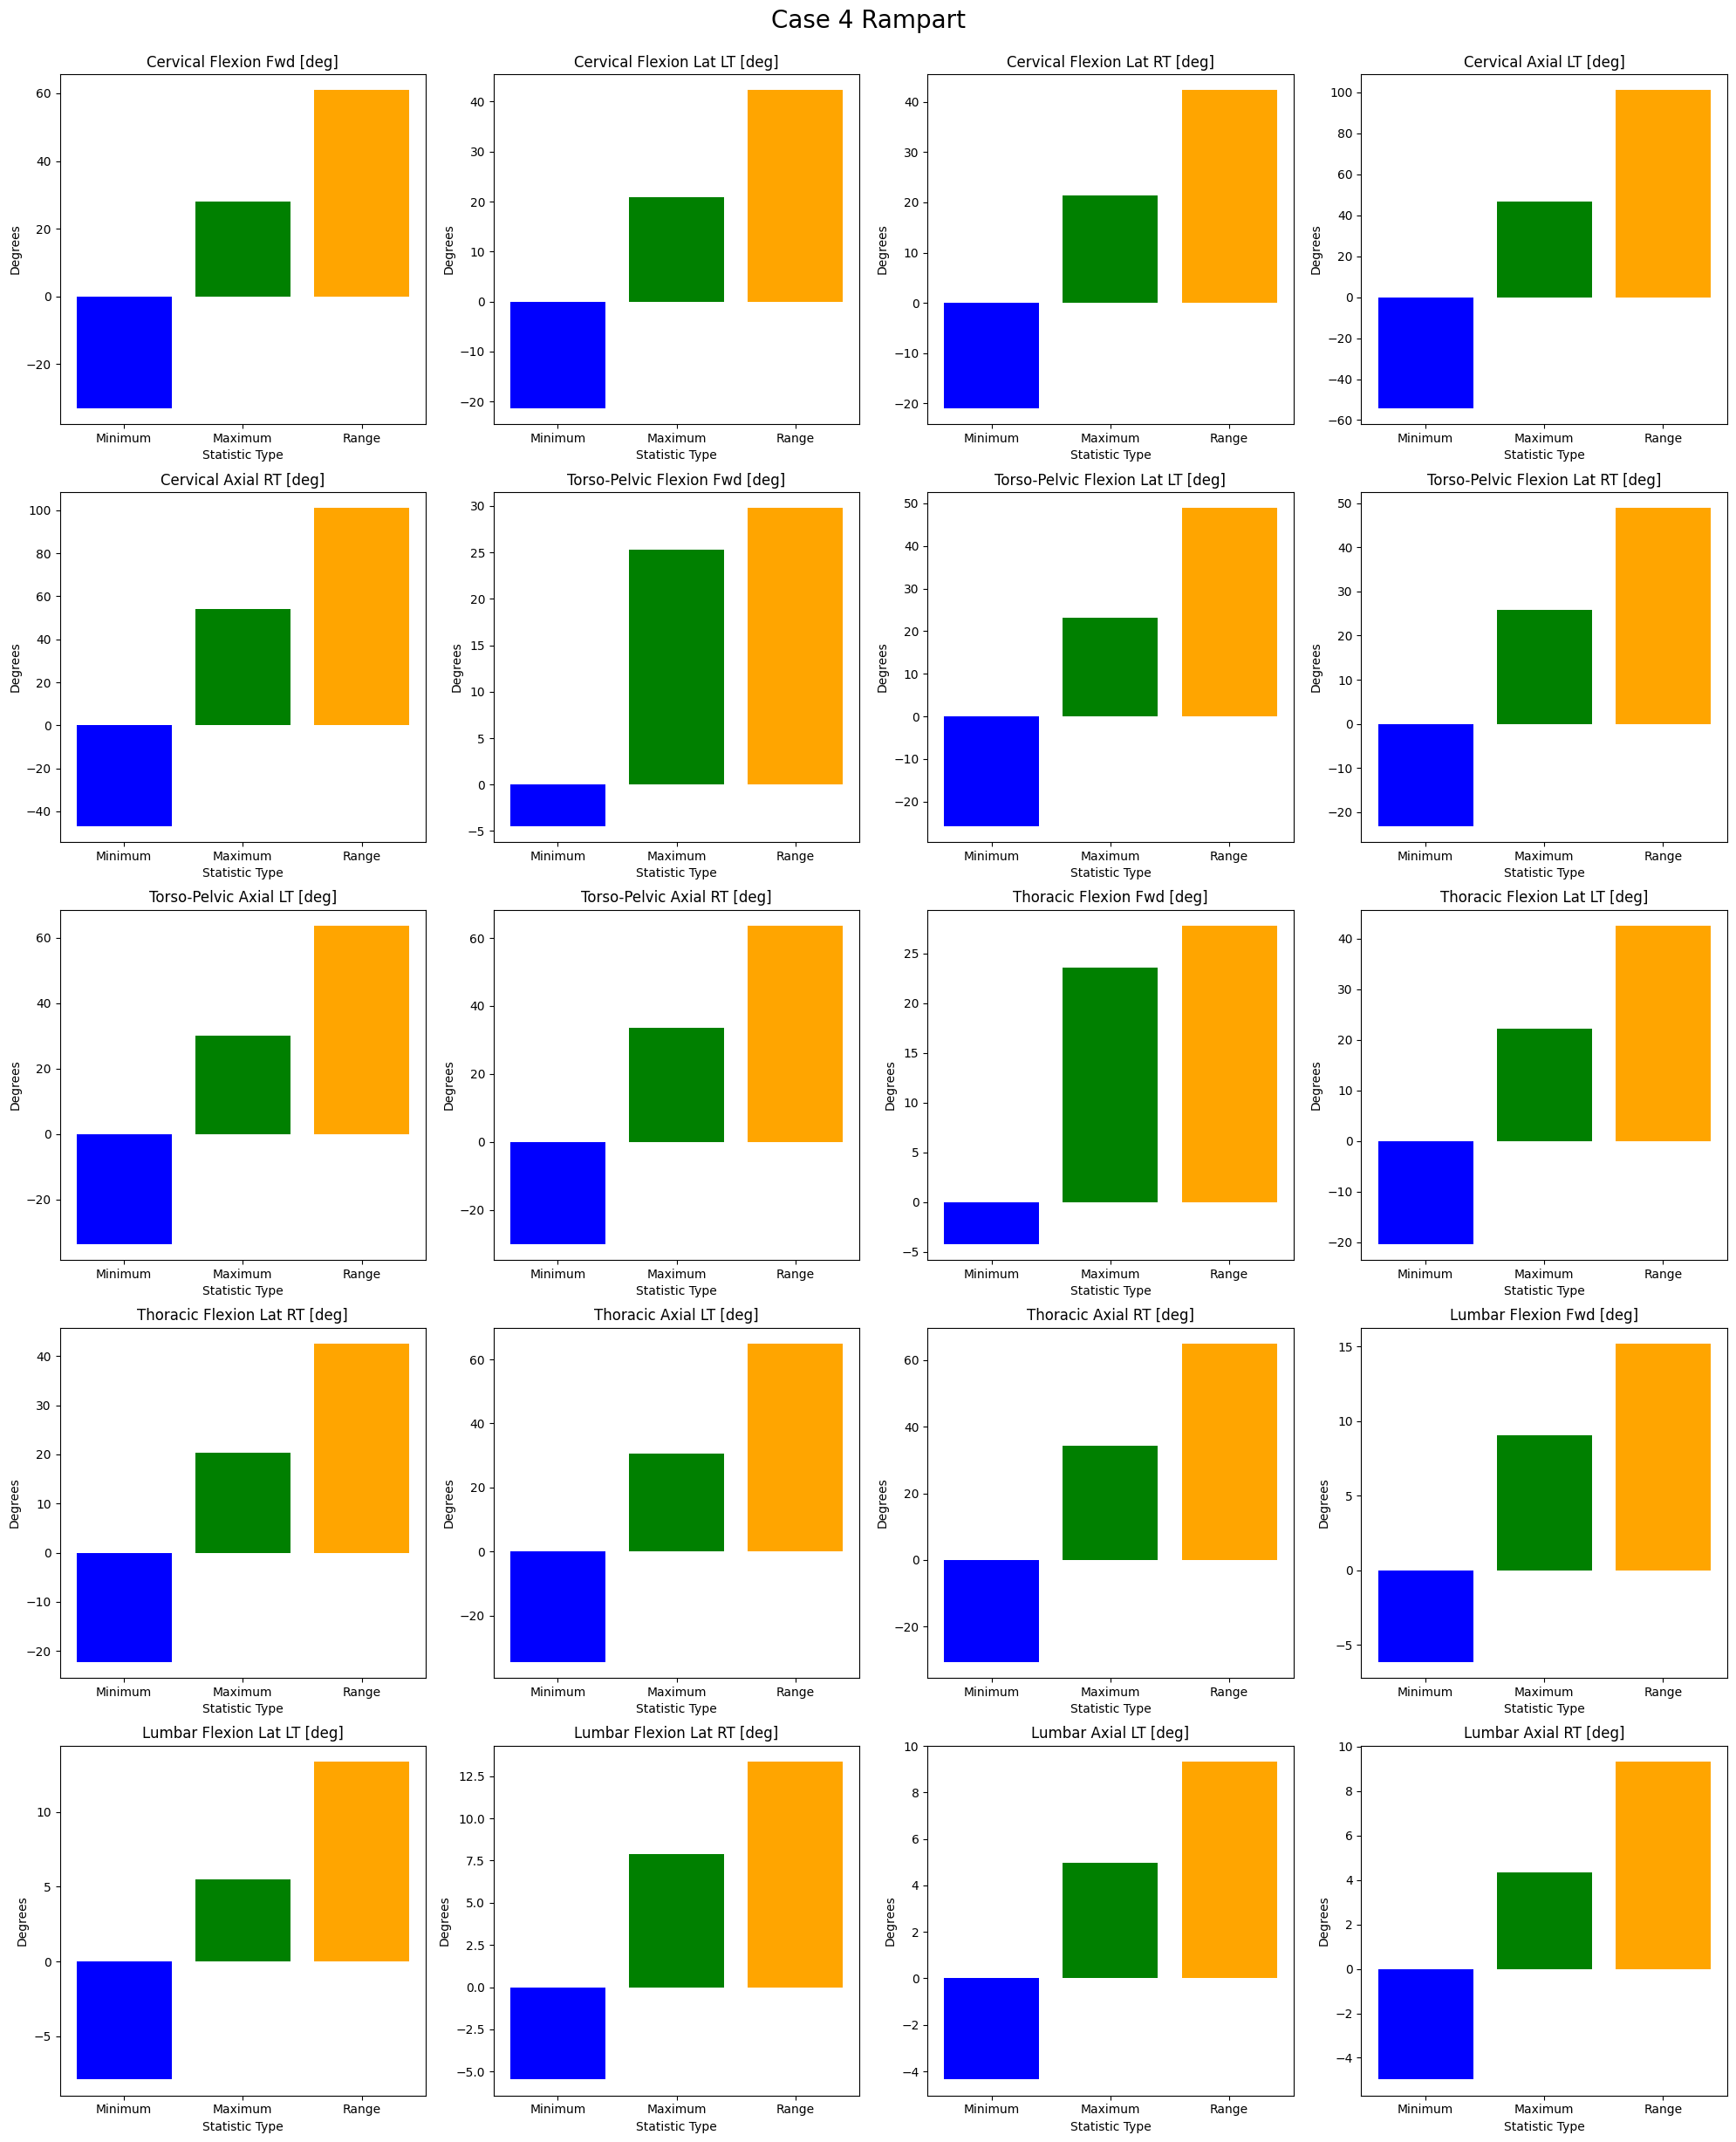

In [32]:
# Reshape the data: extract relevant information and structure for plotting
stats_data = kinematics_4.set_index(kinematics_4.columns[0]).T
stats_data.columns = ['Minimum', 'Maximum', 'Range']

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
axes = axes.flatten()

# Iterate through each degree type to plot individual graphs
degree_types = stats_data.index
for i, degree_type in enumerate(degree_types):
    axes[i].bar(['Minimum', 'Maximum', 'Range'], stats_data.loc[degree_type], color=['blue', 'green', 'orange'])
    axes[i].set_title(f'{degree_type}')
    axes[i].set_ylabel('Degrees')
    axes[i].set_xlabel('Statistic Type')

# Adjust layout and add a title to the figure
plt.tight_layout()
fig.suptitle('Case 4 Rampart', fontsize=20)
plt.subplots_adjust(top=0.95)  # Adjust the top to make room for the title
plt.show()

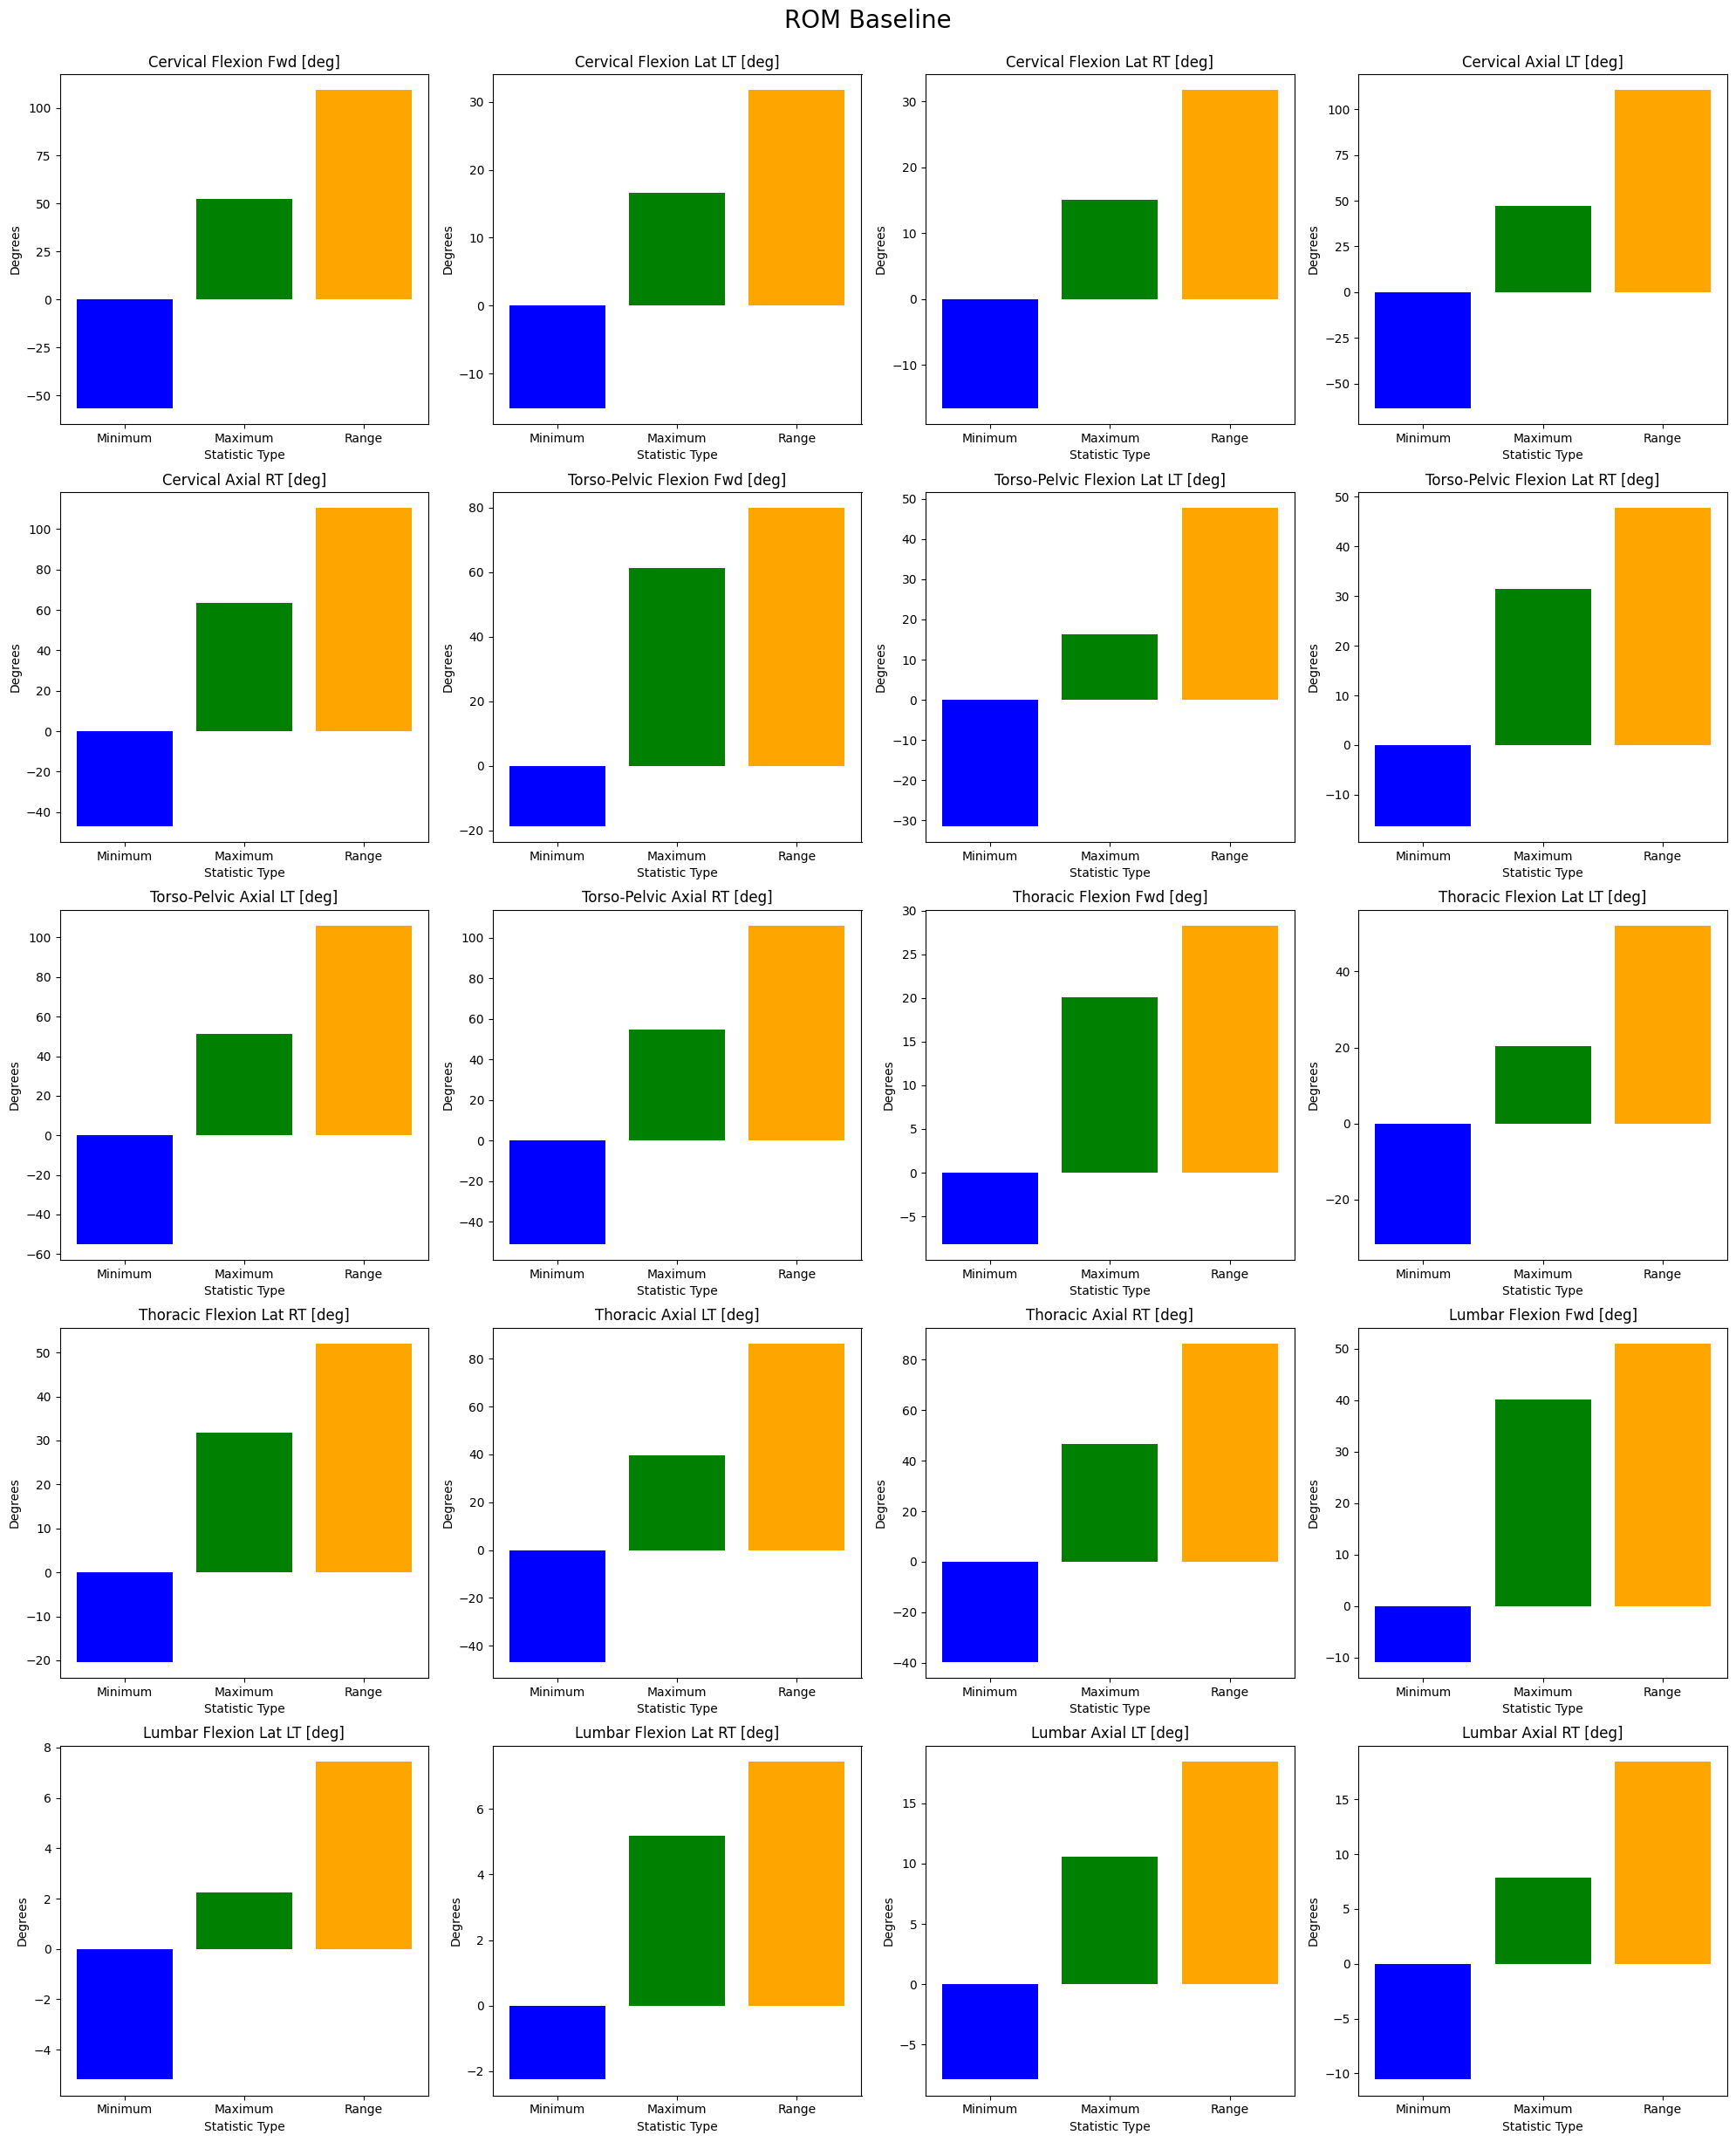

In [33]:
# Reshape the data: extract relevant information and structure for plotting
stats_data = kinematics_ROM.set_index(kinematics_ROM.columns[0]).T
stats_data.columns = ['Minimum', 'Maximum', 'Range']

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
axes = axes.flatten()

# Iterate through each degree type to plot individual graphs
degree_types = stats_data.index
for i, degree_type in enumerate(degree_types):
    axes[i].bar(['Minimum', 'Maximum', 'Range'], stats_data.loc[degree_type], color=['blue', 'green', 'orange'])
    axes[i].set_title(f'{degree_type}')
    axes[i].set_ylabel('Degrees')
    axes[i].set_xlabel('Statistic Type')

# Adjust layout and add a title to the figure
plt.tight_layout()
fig.suptitle('ROM Baseline', fontsize=20)
plt.subplots_adjust(top=0.95)  # Adjust the top to make room for the title
plt.show()

Showcase the difference between each case's range.

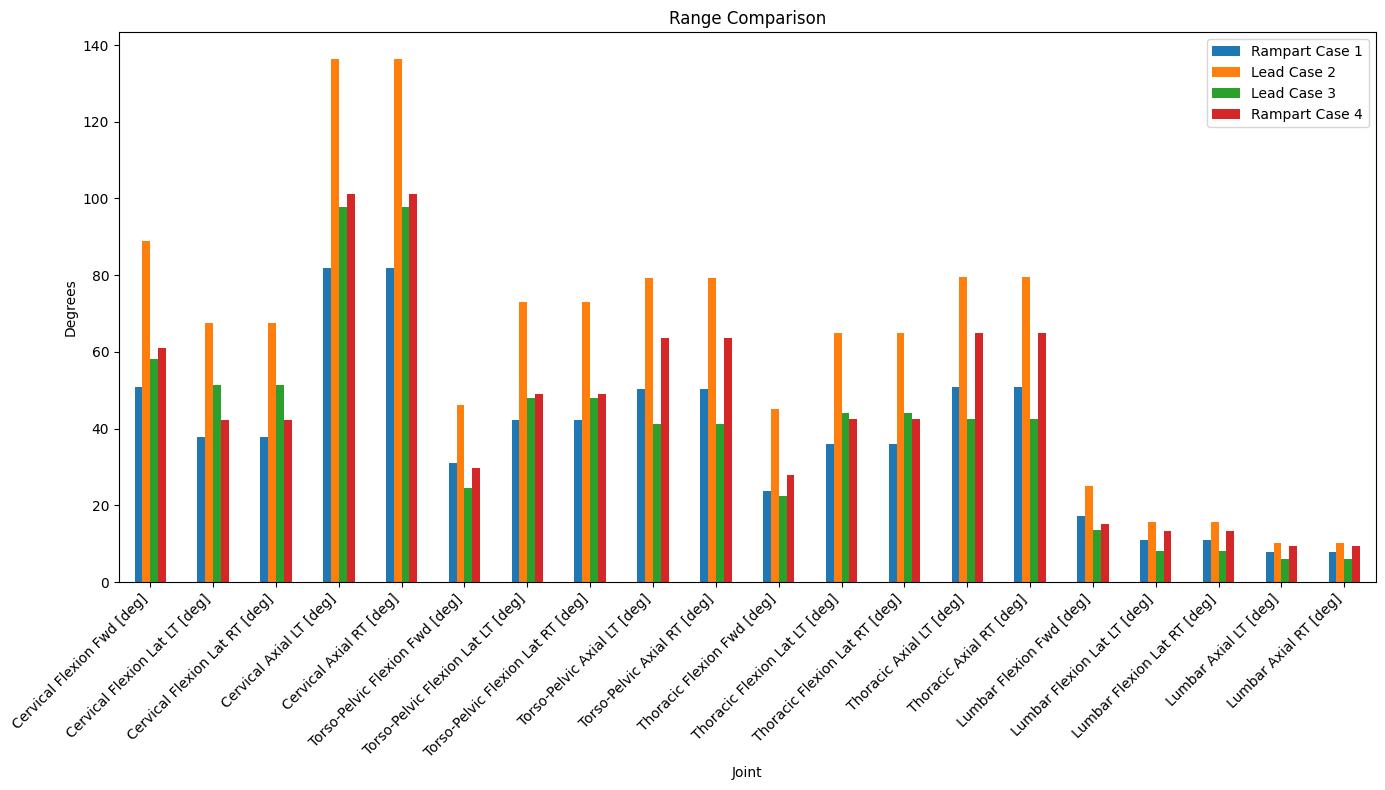

In [34]:
# Calculate the averages for each case
kinematics_1_range = kinematics_1.iloc[2, 1:].astype(float)
kinematics_2_range = kinematics_2.iloc[2, 1:].astype(float)
kinematics_3_range = kinematics_3.iloc[2, 1:].astype(float)
kinematics_4_range = kinematics_4.iloc[2, 1:].astype(float)

# Combine the averages into a single DataFrame
averages_df = pd.DataFrame({
    'Rampart Case 1': kinematics_1_range,
    'Lead Case 2': kinematics_2_range,
    'Lead Case 3': kinematics_3_range,
    'Rampart Case 4': kinematics_4_range
})

# Plot the comparison
averages_df.plot(kind='bar', figsize=(14, 8))
plt.title('Range Comparison')
plt.ylabel('Degrees')
plt.xlabel('Joint')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

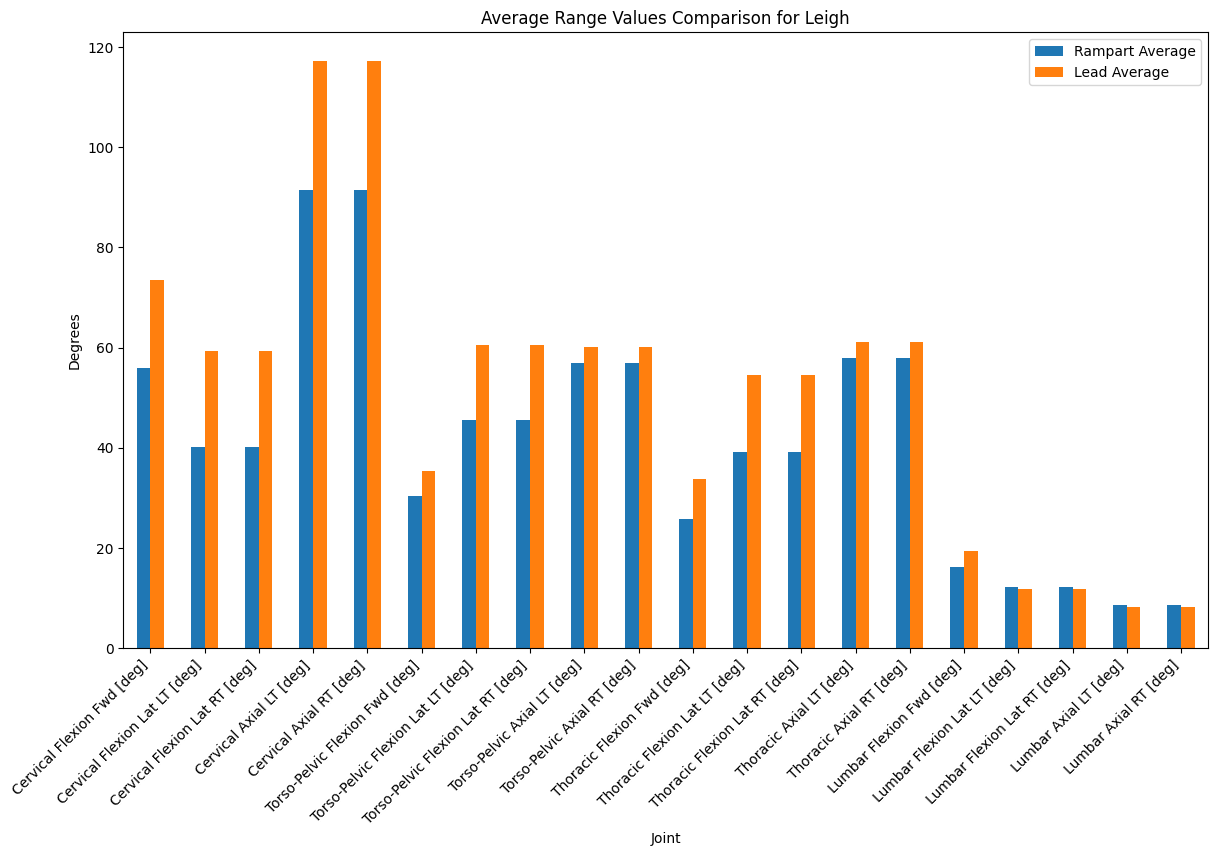

In [35]:
# Extract the range values for each case
range_case_1 = kinematics_1.iloc[2, 1:].astype(float)
range_case_4 = kinematics_4.iloc[2, 1:].astype(float)
range_case_2 = kinematics_2.iloc[2, 1:].astype(float)
range_case_3 = kinematics_3.iloc[2, 1:].astype(float)

# Calculate the average range values for rampart and lead studies
average_rampart = (range_case_1 + range_case_4) / 2
average_lead = (range_case_2 + range_case_3) / 2

# Combine the averages into a single DataFrame for comparison
average_df = pd.DataFrame({
    'Rampart Average': average_rampart,
    'Lead Average': average_lead
})

# Plot the comparison
average_df.plot(kind='bar', figsize=(14, 8))
plt.title('Average Range Values Comparison for Leigh')
plt.ylabel('Degrees')
plt.xlabel('Joint')
plt.xticks(rotation=45, ha='right')
plt.show()


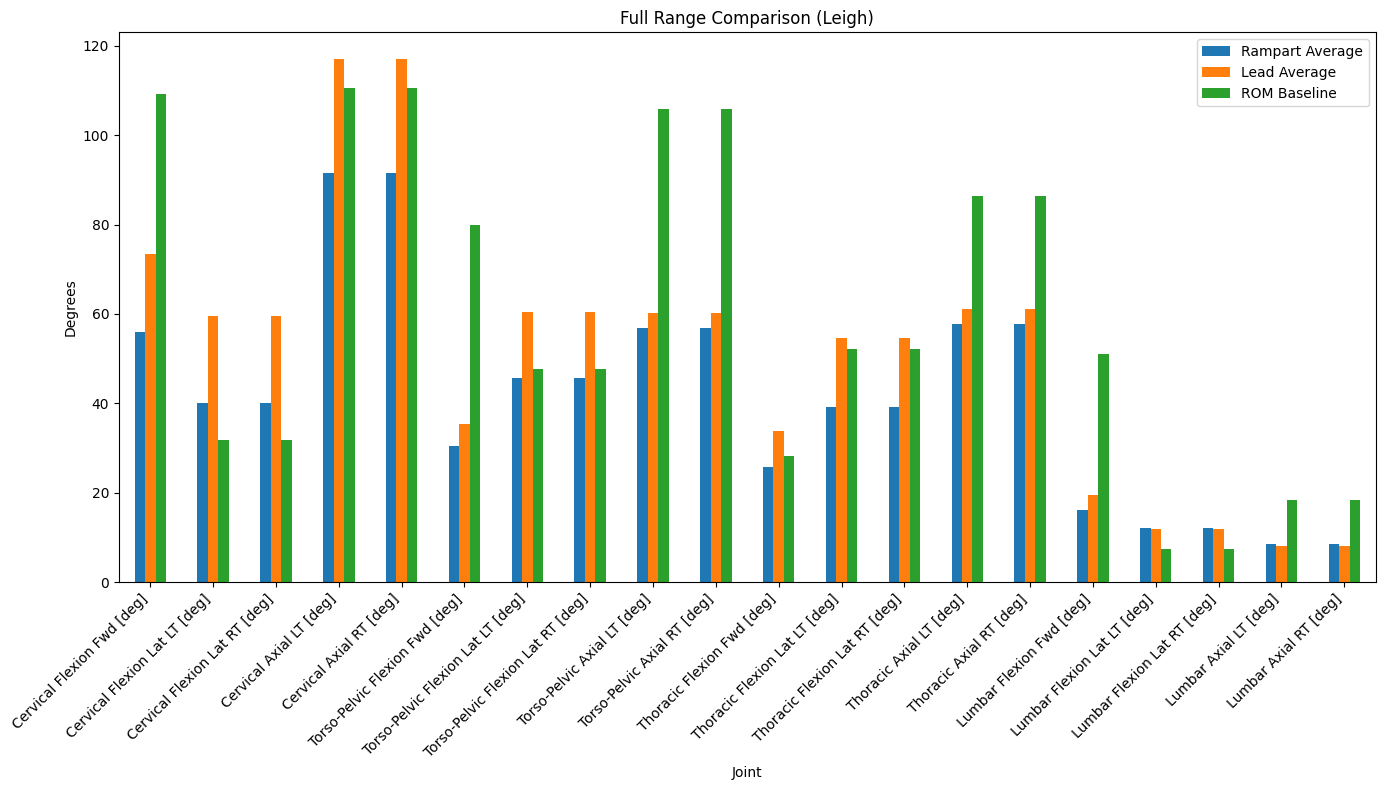

In [36]:
# Extract the range values for each case and ROM baseline
range_case_1 = kinematics_1.iloc[2, 1:].astype(float)
range_case_2 = kinematics_2.iloc[2, 1:].astype(float)
range_case_3 = kinematics_3.iloc[2, 1:].astype(float)
range_case_4 = kinematics_4.iloc[2, 1:].astype(float)
range_ROM = kinematics_ROM.iloc[2, 1:].astype(float)

# Calculate the average range values for rampart and lead studies
average_rampart = (range_case_1 + range_case_4) / 2
average_lead = (range_case_2 + range_case_3) / 2

# Combine the averages into a single DataFrame for comparison
average_df = pd.DataFrame({
    'Rampart Average': average_rampart,
    'Lead Average': average_lead,
    'ROM Baseline': range_ROM
})
# Plot the comparison
average_df.plot(kind='bar', figsize=(14, 8))
plt.title('Full Range Comparison (Leigh)')
plt.ylabel('Degrees')
plt.xlabel('Joint')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()